# AI Personality Drift Simulation - Descriptive Statistics
 
This notebook generates descriptive statistics and publication-quality figures for the research paper, including:
- Summary statistics for all variables
- Distribution plots and visualizations
- Correlation matrices
- Condition comparisons
- Baseline analysis
- Publication-ready figure generation
# 
**Author**: Mike Keeman  
**Date**: July 2025  
**Version**: 1.0

In [1]:
import sys
import os
sys.path.append('../../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime

# Analysis imports
from analysis.statistical_analyzer import StatisticalAnalyzer
from analysis.visualization_toolkit import VisualizationToolkit
from analysis.data_export import DataExporter

# Model imports
from models import Persona, AssessmentResult, PHQ9Result, GAD7Result, PSS10Result
from models.persona import PersonalityTrait

In [2]:
# Setup plotting style for publication
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 14

# Initialize analysis tools
stats_analyzer = StatisticalAnalyzer()
viz_toolkit = VisualizationToolkit(style="publication")
data_exporter = DataExporter()

# %%
# Create output directory
output_dir = Path("../../data/results/publication")
output_dir.mkdir(parents=True, exist_ok=True)

## Load Research Data

In [4]:
# Load assessment data (sample data if files not found)
assessment_data_path = Path("../../data/simulation/assessment_results.csv")
if assessment_data_path.exists():
    assessment_data = pd.read_csv(assessment_data_path)
    print(f"Loaded {len(assessment_data)} assessment records")
else:
    # Create sample data for demonstration
    print("Assessment data not found, creating sample data...")
    np.random.seed(42)
    
    # Generate sample assessment data
    personas = ['persona_1', 'persona_2', 'persona_3', 'persona_4', 'persona_5']
    assessment_types = ['phq9', 'gad7', 'pss10']
    days = range(0, 30, 7)  # Weekly assessments
    
    assessment_data = []
    for persona in personas:
        for assessment_type in assessment_types:
            baseline_score = np.random.uniform(5, 15)
            for day in days:
                # Add some drift over time
                drift = np.random.normal(0, 0.5) * (day / 30)
                score = max(0, baseline_score + drift)
                
                assessment_data.append({
                    'assessment_id': f"{persona}_{assessment_type}_{day}",
                    'persona_id': persona,
                    'assessment_type': assessment_type,
                    'simulation_day': day,
                    'total_score': score,
                    'severity_level': 'mild' if score < 10 else 'moderate',
                    'response_consistency': np.random.uniform(0.7, 0.95),
                    'response_time_avg': np.random.uniform(2.0, 5.0),
                    'created_at': datetime.now().isoformat()
                })
    
    assessment_data = pd.DataFrame(assessment_data)
    print(f"Created sample data with {len(assessment_data)} records")

print("Assessment data summary:")
print(assessment_data.describe())

Assessment data not found, creating sample data...
Created sample data with 75 records
Assessment data summary:
       simulation_day  total_score  response_consistency  response_time_avg
count       75.000000    75.000000             75.000000          75.000000
mean        14.000000    10.847781              0.817559           3.293743
std          9.966159     2.834975              0.067831           0.899802
min          0.000000     4.872979              0.701265           2.020856
25%          7.000000     8.667558              0.760488           2.510025
50%         14.000000    10.107473              0.823449           3.103349
75%         21.000000    13.858793              0.870225           4.083366
max         28.000000    15.129664              0.940612           4.960661


In [5]:
# Load persona data (sample data if files not found)
persona_data_path = Path("../../data/simulation/persona_data.csv")
if persona_data_path.exists():
    persona_data = pd.read_csv(persona_data_path)
    print(f"Loaded {len(persona_data)} persona records")
else:
    # Create sample persona data
    print("Persona data not found, creating sample data...")
    
    persona_data = []
    for i, persona in enumerate(personas):
        persona_data.append({
            'persona_id': persona,
            'name': f'Persona {i+1}',
            'age': np.random.randint(25, 65),
            'occupation': np.random.choice(['Engineer', 'Teacher', 'Doctor', 'Artist', 'Manager']),
            'openness': np.random.uniform(0.3, 0.8),
            'conscientiousness': np.random.uniform(0.4, 0.9),
            'extraversion': np.random.uniform(0.2, 0.7),
            'agreeableness': np.random.uniform(0.5, 0.9),
            'neuroticism': np.random.uniform(0.1, 0.6),
            'baseline_phq9': np.random.uniform(3, 12),
            'baseline_gad7': np.random.uniform(2, 10),
            'baseline_pss10': np.random.uniform(8, 18),
            'drift_magnitude': np.random.uniform(0.05, 0.25),
            'emotional_state': np.random.choice(['neutral', 'anxious', 'depressed', 'content']),
            'stress_level': np.random.uniform(0.1, 0.6)
        })
    
    persona_data = pd.DataFrame(persona_data)
    print(f"Created sample persona data with {len(persona_data)} records")

print("Persona data summary:")
print(persona_data.describe())

Persona data not found, creating sample data...
Created sample persona data with 5 records
Persona data summary:
             age  openness  conscientiousness  extraversion  agreeableness  \
count   5.000000  5.000000           5.000000      5.000000       5.000000   
mean   38.800000  0.564632           0.647455      0.340104       0.651865   
std    14.686729  0.192893           0.066921      0.144475       0.089909   
min    25.000000  0.363530           0.587791      0.220534       0.537549   
25%    30.000000  0.448255           0.609890      0.246991       0.586328   
50%    36.000000  0.468998           0.621176      0.319894       0.659528   
75%    40.000000  0.757607           0.661122      0.328103       0.731312   
max    63.000000  0.784768           0.757298      0.584997       0.744605   

       neuroticism  baseline_phq9  baseline_gad7  baseline_pss10  \
count     5.000000       5.000000       5.000000        5.000000   
mean      0.235681       7.022617       5.378163

In [6]:
# Load mechanistic data (sample data if files not found)
mechanistic_data_path = Path("../../data/simulation/mechanistic_analysis.csv")
if mechanistic_data_path.exists():
    mechanistic_data = pd.read_csv(mechanistic_data_path)
    print(f"Loaded {len(mechanistic_data)} mechanistic records")
else:
    # Create sample mechanistic data
    print("Mechanistic data not found, creating sample data...")
    
    mechanistic_data = []
    layers = range(1, 13)  # 12 transformer layers
    
    for persona in personas:
        for day in days:
            for layer in layers:
                # Generate attention weights and activation values
                attention_weight = np.random.uniform(0.1, 0.9)
                activation_value = np.random.uniform(-1.0, 1.0)
                drift_magnitude = np.random.uniform(0.0, 0.2)
                
                mechanistic_data.append({
                    'persona_id': persona,
                    'simulation_day': day,
                    'layer': layer,
                    'analysis_type': 'attention',
                    'attention_weight': attention_weight,
                    'activation_value': activation_value,
                    'drift_magnitude': drift_magnitude,
                    'created_at': datetime.now().isoformat()
                })
    
    mechanistic_data = pd.DataFrame(mechanistic_data)
    print(f"Created sample mechanistic data with {len(mechanistic_data)} records")

print("Mechanistic data summary:")
print(mechanistic_data.describe())

Mechanistic data not found, creating sample data...
Created sample mechanistic data with 300 records
Mechanistic data summary:
       simulation_day      layer  attention_weight  activation_value  \
count      300.000000  300.00000        300.000000        300.000000   
mean        14.000000    6.50000          0.484416         -0.043841   
std          9.916035    3.45782          0.237910          0.601316   
min          0.000000    1.00000          0.105109         -0.990736   
25%          7.000000    3.75000          0.247456         -0.558094   
50%         14.000000    6.50000          0.465917         -0.068900   
75%         21.000000    9.25000          0.686624          0.500376   
max         28.000000   12.00000          0.898347          0.982337   

       drift_magnitude  
count       300.000000  
mean          0.107883  
std           0.056638  
min           0.002199  
25%           0.057549  
50%           0.113057  
75%           0.155319  
max           0.199944  

## Descriptive Statistics

In [7]:
print("=== Assessment Data Descriptive Statistics ===")
print(assessment_data.describe())

=== Assessment Data Descriptive Statistics ===
       simulation_day  total_score  response_consistency  response_time_avg
count       75.000000    75.000000             75.000000          75.000000
mean        14.000000    10.847781              0.817559           3.293743
std          9.966159     2.834975              0.067831           0.899802
min          0.000000     4.872979              0.701265           2.020856
25%          7.000000     8.667558              0.760488           2.510025
50%         14.000000    10.107473              0.823449           3.103349
75%         21.000000    13.858793              0.870225           4.083366
max         28.000000    15.129664              0.940612           4.960661


In [8]:
# Persona data descriptive statistics
print("=== Persona Data Descriptive Statistics ===")
print(persona_data.describe())

=== Persona Data Descriptive Statistics ===
             age  openness  conscientiousness  extraversion  agreeableness  \
count   5.000000  5.000000           5.000000      5.000000       5.000000   
mean   38.800000  0.564632           0.647455      0.340104       0.651865   
std    14.686729  0.192893           0.066921      0.144475       0.089909   
min    25.000000  0.363530           0.587791      0.220534       0.537549   
25%    30.000000  0.448255           0.609890      0.246991       0.586328   
50%    36.000000  0.468998           0.621176      0.319894       0.659528   
75%    40.000000  0.757607           0.661122      0.328103       0.731312   
max    63.000000  0.784768           0.757298      0.584997       0.744605   

       neuroticism  baseline_phq9  baseline_gad7  baseline_pss10  \
count     5.000000       5.000000       5.000000        5.000000   
mean      0.235681       7.022617       5.378163       11.426400   
std       0.124783       3.634543       2.079017 

In [9]:
print("=== Mechanistic Data Descriptive Statistics ===")
print(mechanistic_data.describe())

=== Mechanistic Data Descriptive Statistics ===
       simulation_day      layer  attention_weight  activation_value  \
count      300.000000  300.00000        300.000000        300.000000   
mean        14.000000    6.50000          0.484416         -0.043841   
std          9.916035    3.45782          0.237910          0.601316   
min          0.000000    1.00000          0.105109         -0.990736   
25%          7.000000    3.75000          0.247456         -0.558094   
50%         14.000000    6.50000          0.465917         -0.068900   
75%         21.000000    9.25000          0.686624          0.500376   
max         28.000000   12.00000          0.898347          0.982337   

       drift_magnitude  
count       300.000000  
mean          0.107883  
std           0.056638  
min           0.002199  
25%           0.057549  
50%           0.113057  
75%           0.155319  
max           0.199944  


In [10]:
# Assessment scores by type
print("=== Assessment Scores by Type ===")
for assessment_type in assessment_data['assessment_type'].unique():
    type_data = assessment_data[assessment_data['assessment_type'] == assessment_type]['total_score']
    print(f"\n{assessment_type.upper()}:")
    print(f"  Mean: {type_data.mean():.2f}")
    print(f"  Std: {type_data.std():.2f}")
    print(f"  Min: {type_data.min():.2f}")
    print(f"  Max: {type_data.max():.2f}")
    print(f"  Median: {type_data.median():.2f}")

=== Assessment Scores by Type ===

PHQ9:
  Mean: 10.97
  Std: 2.20
  Min: 8.48
  Max: 14.89
  Median: 11.21

GAD7:
  Mean: 11.36
  Std: 2.35
  Min: 8.33
  Max: 14.61
  Median: 10.11

PSS10:
  Mean: 10.21
  Std: 3.70
  Min: 4.87
  Max: 15.13
  Median: 9.28


In [11]:
# Personality traits descriptive statistics
trait_columns = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']
print("=== Personality Traits Descriptive Statistics ===")
for trait in trait_columns:
    trait_data = persona_data[trait]
    print(f"\n{trait.title()}:")
    print(f"  Mean: {trait_data.mean():.3f}")
    print(f"  Std: {trait_data.std():.3f}")
    print(f"  Min: {trait_data.min():.3f}")
    print(f"  Max: {trait_data.max():.3f}")
    print(f"  Median: {trait_data.median():.3f}")

=== Personality Traits Descriptive Statistics ===

Openness:
  Mean: 0.565
  Std: 0.193
  Min: 0.364
  Max: 0.785
  Median: 0.469

Conscientiousness:
  Mean: 0.647
  Std: 0.067
  Min: 0.588
  Max: 0.757
  Median: 0.621

Extraversion:
  Mean: 0.340
  Std: 0.144
  Min: 0.221
  Max: 0.585
  Median: 0.320

Agreeableness:
  Mean: 0.652
  Std: 0.090
  Min: 0.538
  Max: 0.745
  Median: 0.660

Neuroticism:
  Mean: 0.236
  Std: 0.125
  Min: 0.118
  Max: 0.411
  Median: 0.191


## Distribution Analysis

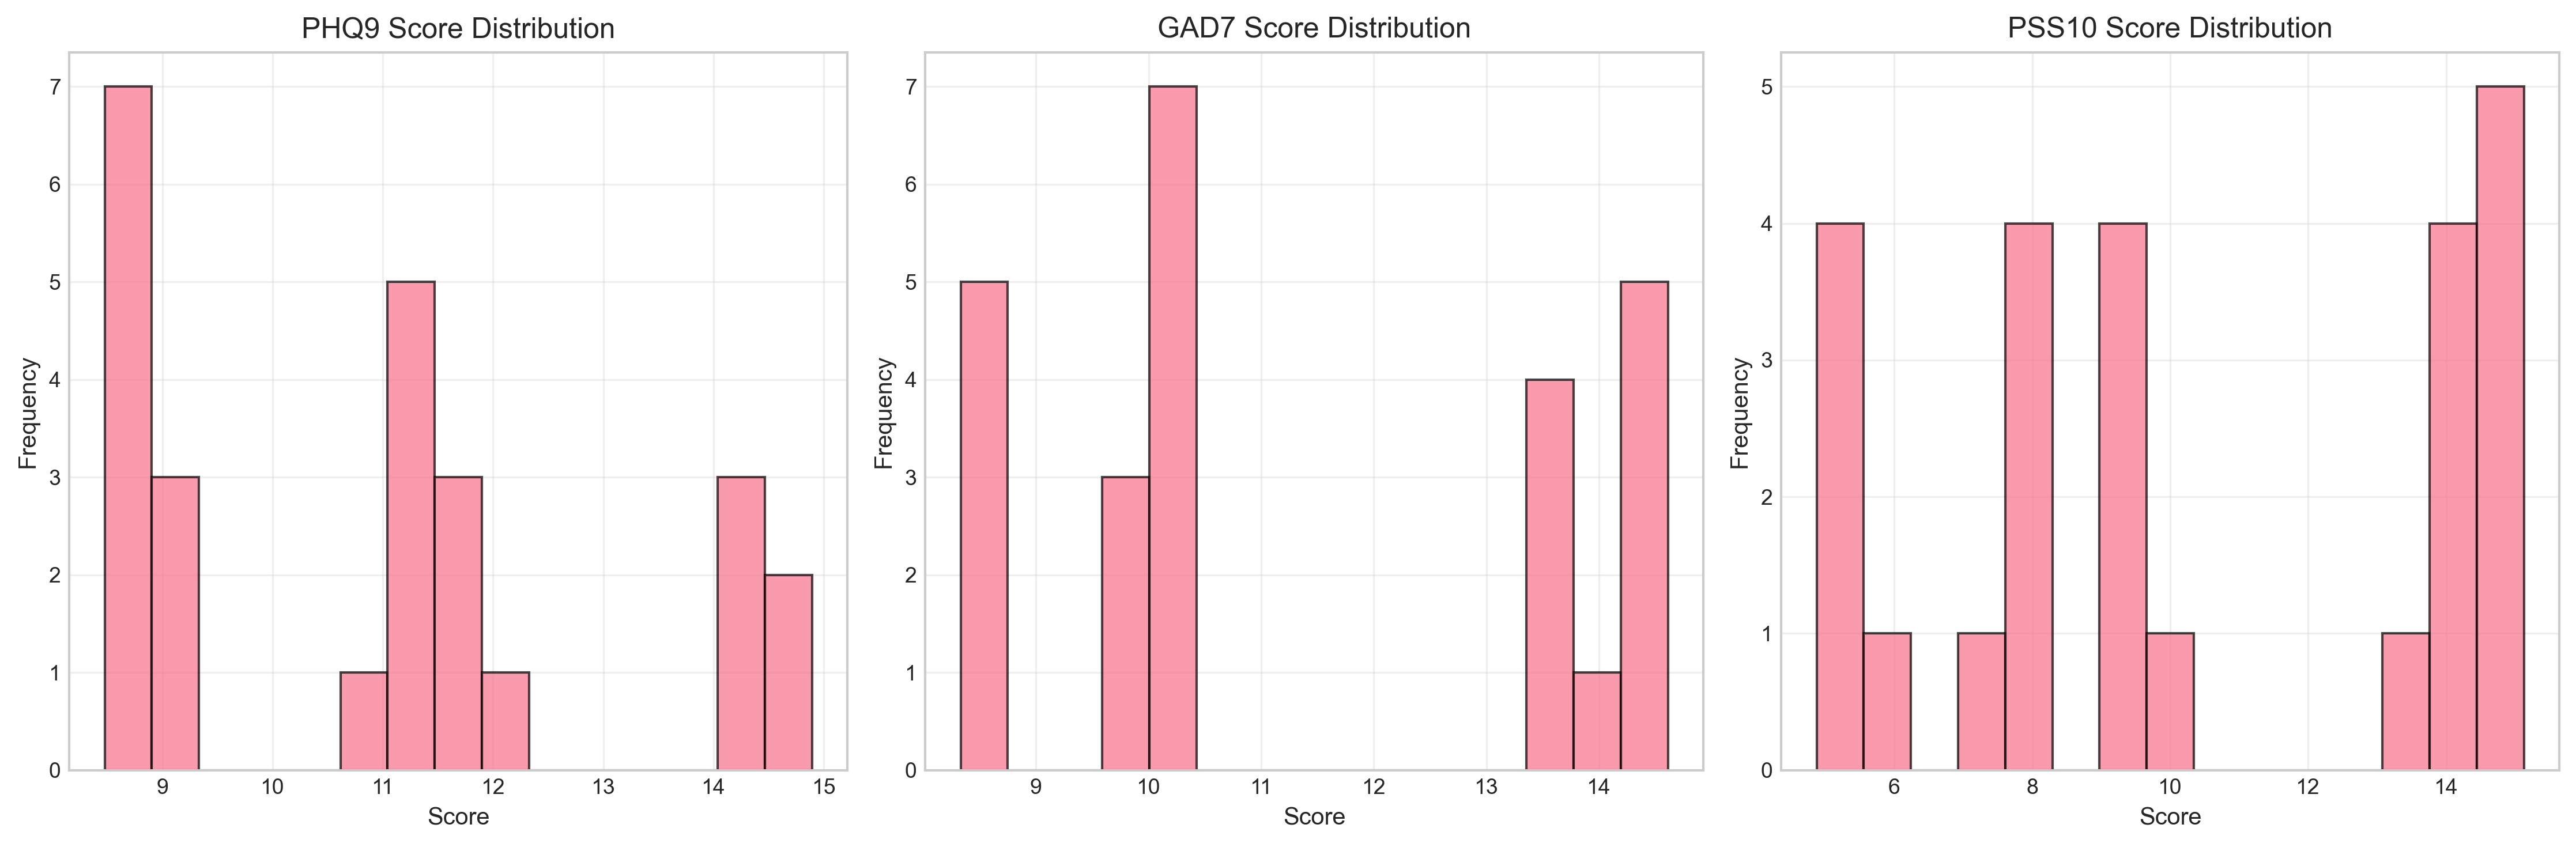

In [12]:
# Distribution of assessment scores
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, assessment_type in enumerate(['phq9', 'gad7', 'pss10']):
    type_data = assessment_data[assessment_data['assessment_type'] == assessment_type]['total_score']
    
    axes[i].hist(type_data, bins=15, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{assessment_type.upper()} Score Distribution')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / "assessment_score_distributions.png", bbox_inches='tight')
plt.show()

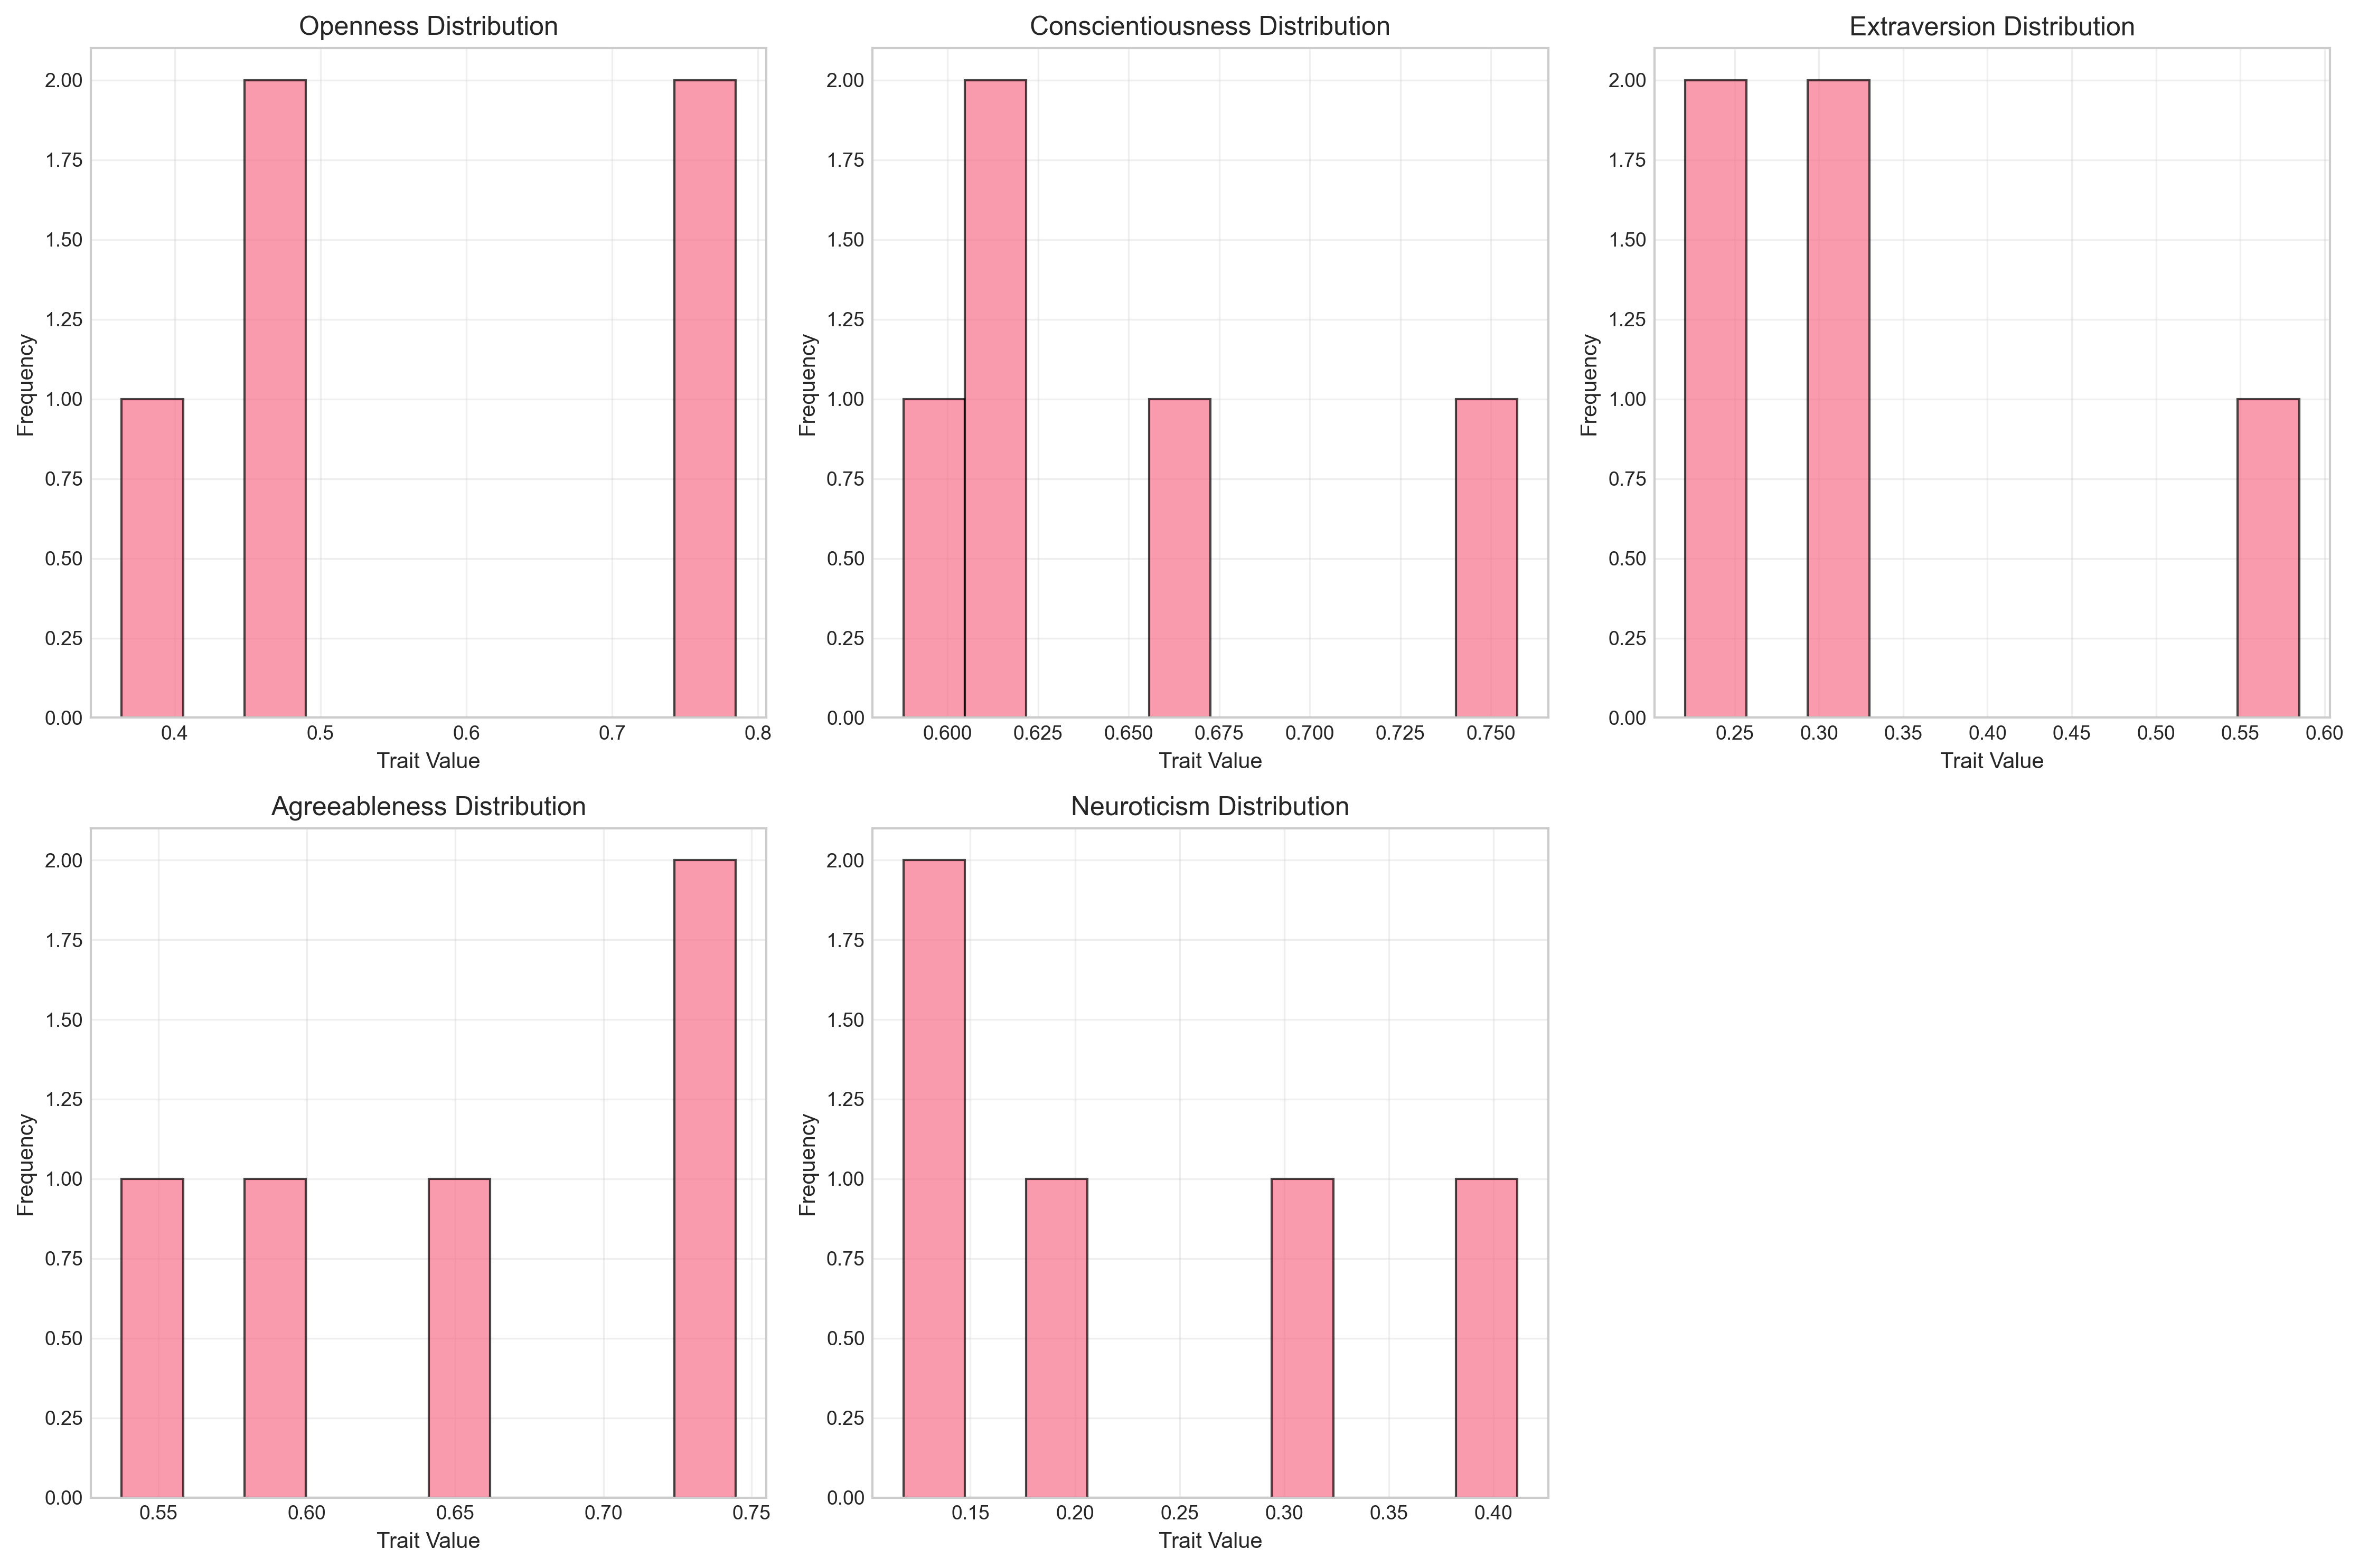

In [13]:
# Distribution of personality traits
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, trait in enumerate(trait_columns):
    row = i // 3
    col = i % 3
    
    trait_data = persona_data[trait]
    axes[row, col].hist(trait_data, bins=10, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{trait.title()} Distribution')
    axes[row, col].set_xlabel('Trait Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

# Remove the last subplot if not needed
if len(trait_columns) < 6:
    axes[1, 2].remove()

plt.tight_layout()
plt.savefig(output_dir / "personality_trait_distributions.png", bbox_inches='tight')
plt.show()

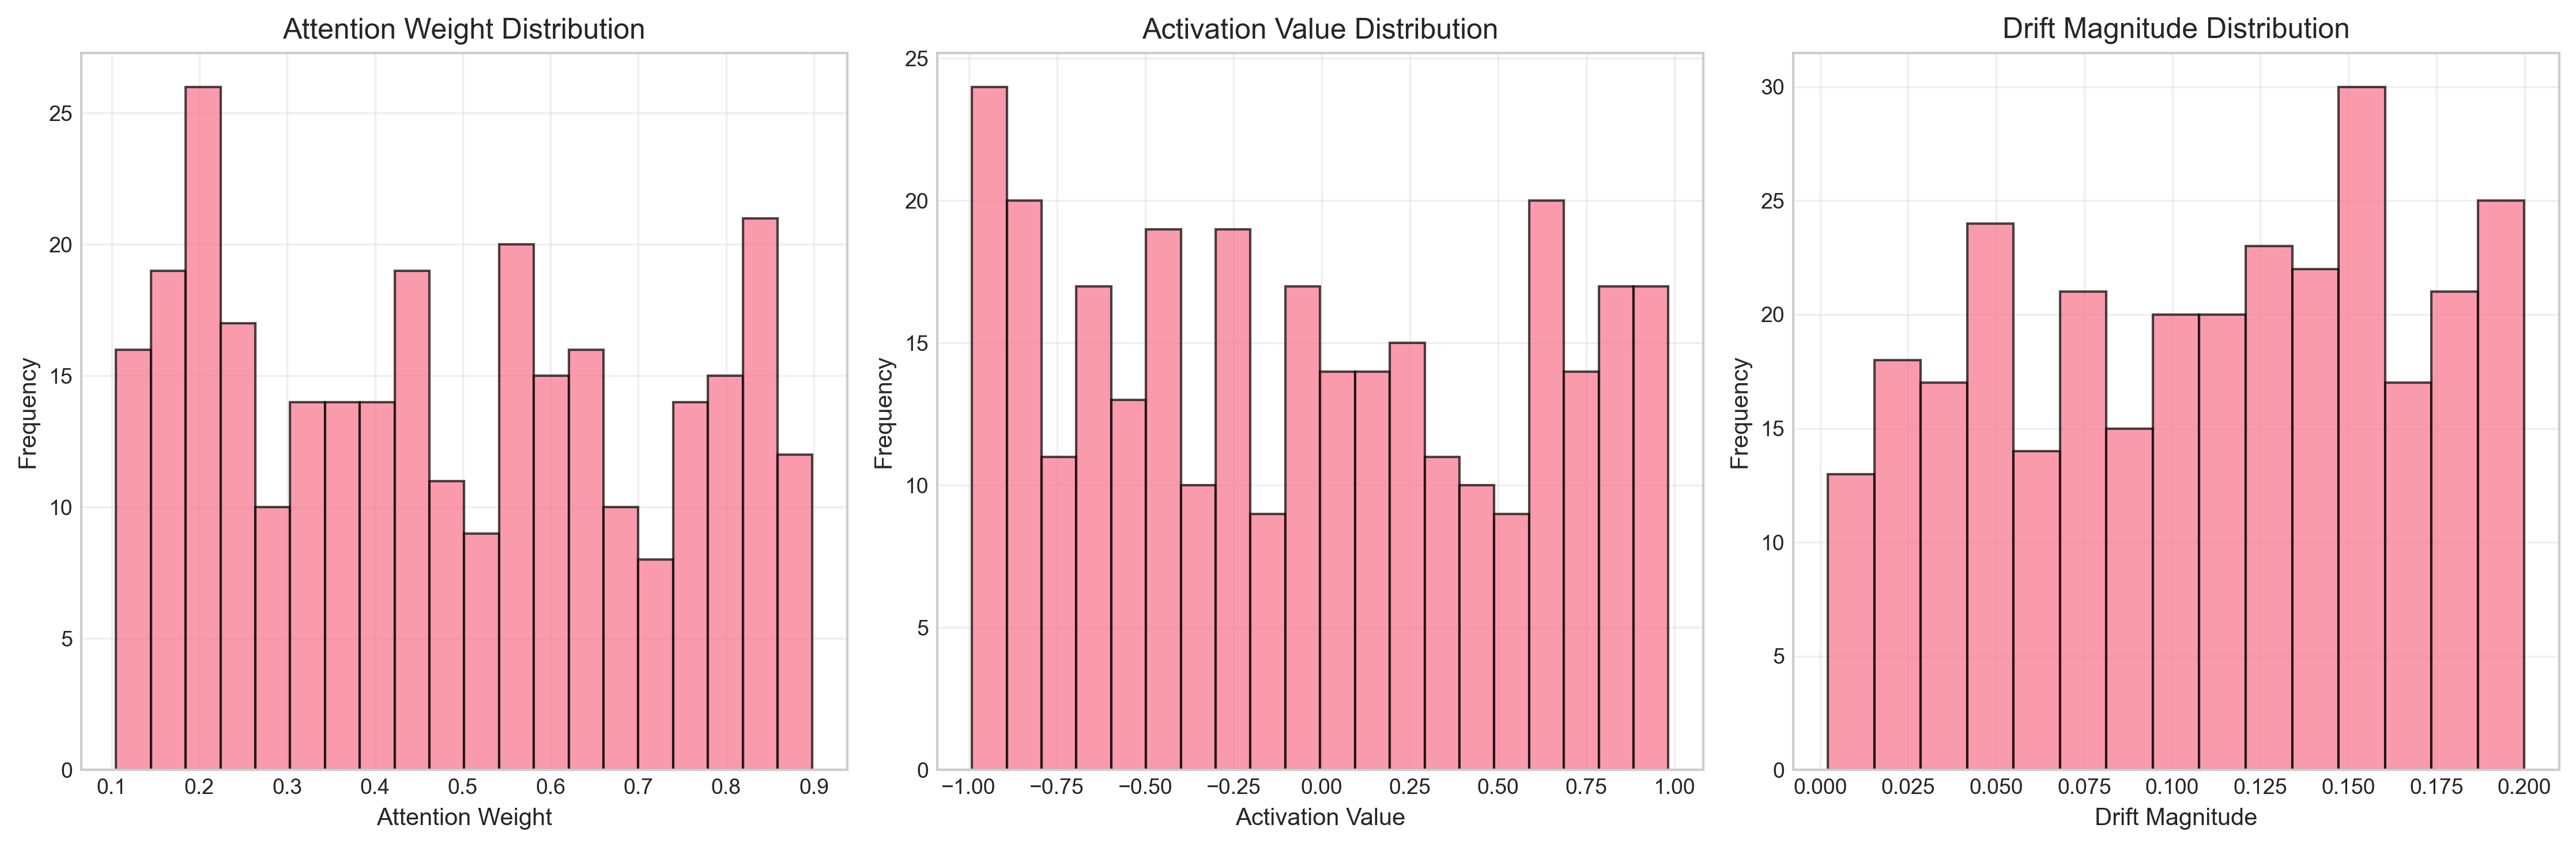

In [14]:
# Distribution of mechanistic data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Attention weights
attention_data = mechanistic_data['attention_weight']
axes[0].hist(attention_data, bins=20, alpha=0.7, edgecolor='black')
axes[0].set_title('Attention Weight Distribution')
axes[0].set_xlabel('Attention Weight')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Activation values
activation_data = mechanistic_data['activation_value']
axes[1].hist(activation_data, bins=20, alpha=0.7, edgecolor='black')
axes[1].set_title('Activation Value Distribution')
axes[1].set_xlabel('Activation Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Drift magnitude
drift_data = mechanistic_data['drift_magnitude']
axes[2].hist(drift_data, bins=15, alpha=0.7, edgecolor='black')
axes[2].set_title('Drift Magnitude Distribution')
axes[2].set_xlabel('Drift Magnitude')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / "mechanistic_data_distributions.png", bbox_inches='tight')
plt.show()

## Correlation Analysis


In [15]:
# Correlation matrix for assessment scores
assessment_corr = assessment_data[['total_score', 'response_consistency', 'response_time_avg']].corr()
print("=== Assessment Data Correlation Matrix ===")
print(assessment_corr)

=== Assessment Data Correlation Matrix ===
                      total_score  response_consistency  response_time_avg
total_score              1.000000              0.010869           0.132565
response_consistency     0.010869              1.000000          -0.140042
response_time_avg        0.132565             -0.140042           1.000000


In [16]:
# Correlation matrix for personality traits
personality_corr = persona_data[trait_columns].corr()
print("=== Personality Traits Correlation Matrix ===")
print(personality_corr)

=== Personality Traits Correlation Matrix ===
                   openness  conscientiousness  extraversion  agreeableness  \
openness           1.000000           0.512031     -0.620500      -0.368802   
conscientiousness  0.512031           1.000000     -0.084029      -0.219123   
extraversion      -0.620500          -0.084029      1.000000      -0.445855   
agreeableness     -0.368802          -0.219123     -0.445855       1.000000   
neuroticism       -0.038817           0.690314      0.642637      -0.534594   

                   neuroticism  
openness             -0.038817  
conscientiousness     0.690314  
extraversion          0.642637  
agreeableness        -0.534594  
neuroticism           1.000000  


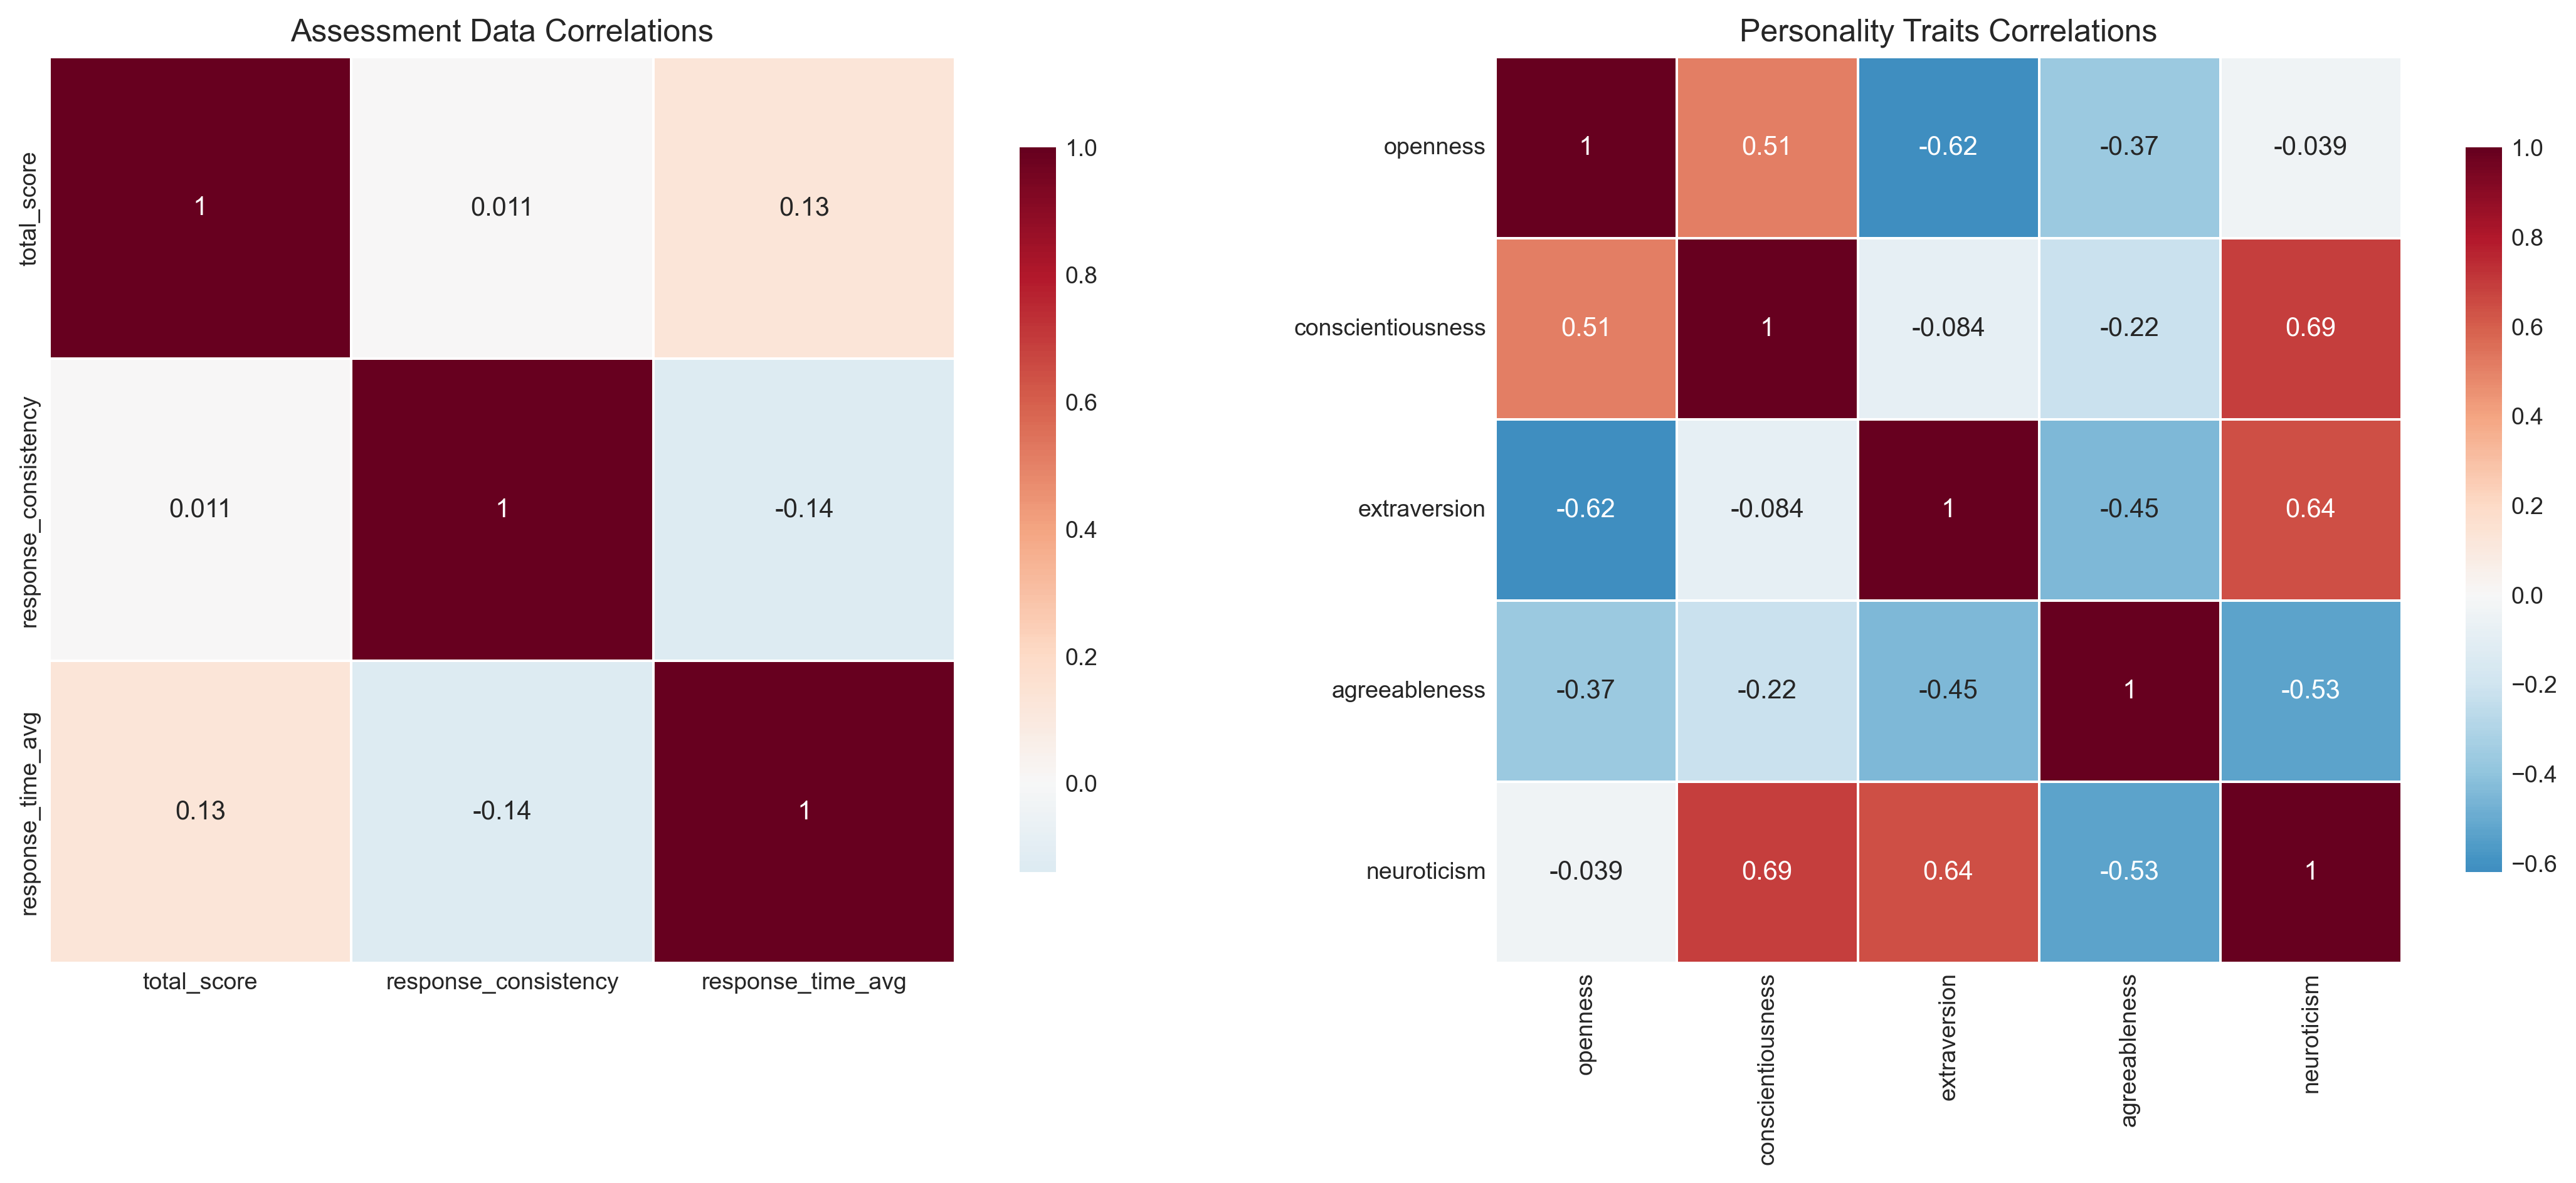

In [17]:
# Visualize correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Assessment correlations
sns.heatmap(assessment_corr, annot=True, cmap='RdBu_r', center=0, 
           square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=axes[0])
axes[0].set_title('Assessment Data Correlations')

# Personality correlations
sns.heatmap(personality_corr, annot=True, cmap='RdBu_r', center=0, 
           square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=axes[1])
axes[1].set_title('Personality Traits Correlations')

plt.tight_layout()
plt.savefig(output_dir / "correlation_matrices.png", bbox_inches='tight')
plt.show()

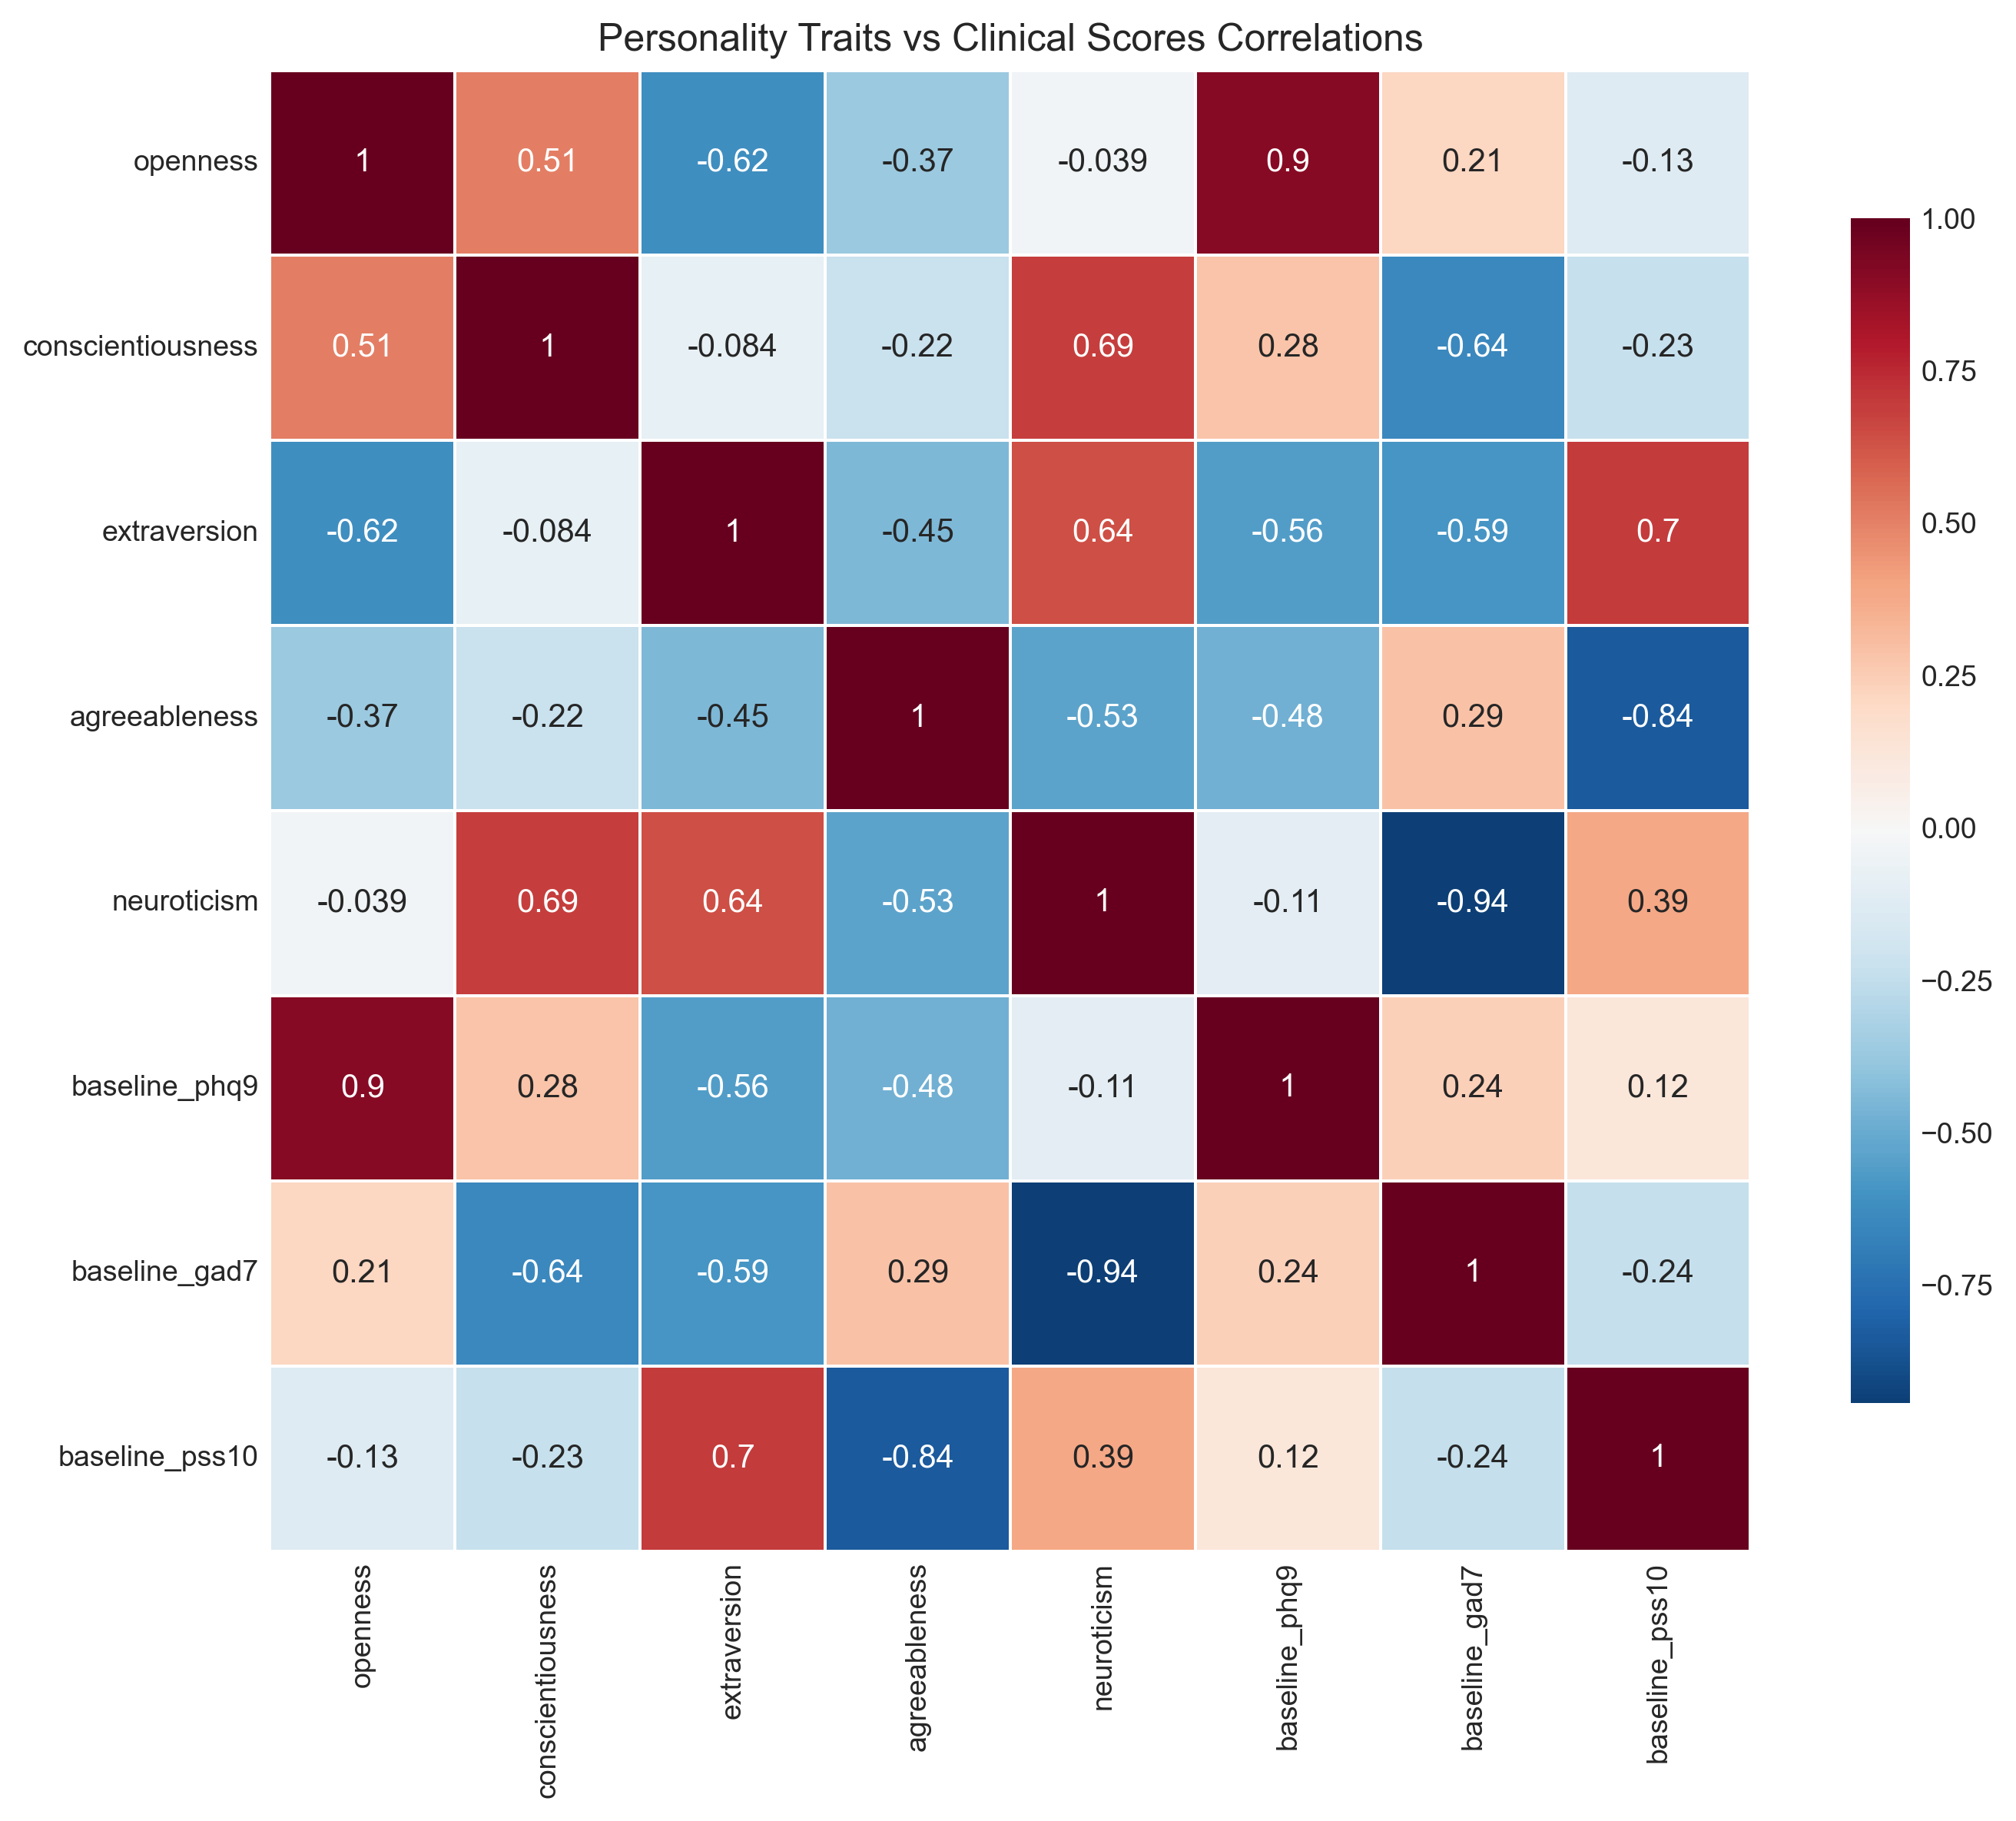

In [18]:
# Correlation between personality traits and clinical scores
clinical_traits = persona_data[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism',
                               'baseline_phq9', 'baseline_gad7', 'baseline_pss10']]
clinical_corr = clinical_traits.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(clinical_corr, annot=True, cmap='RdBu_r', center=0, 
           square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax)
ax.set_title('Personality Traits vs Clinical Scores Correlations')

plt.tight_layout()
plt.savefig(output_dir / "personality_clinical_correlations.png", bbox_inches='tight')
plt.show()

## Condition Comparisons

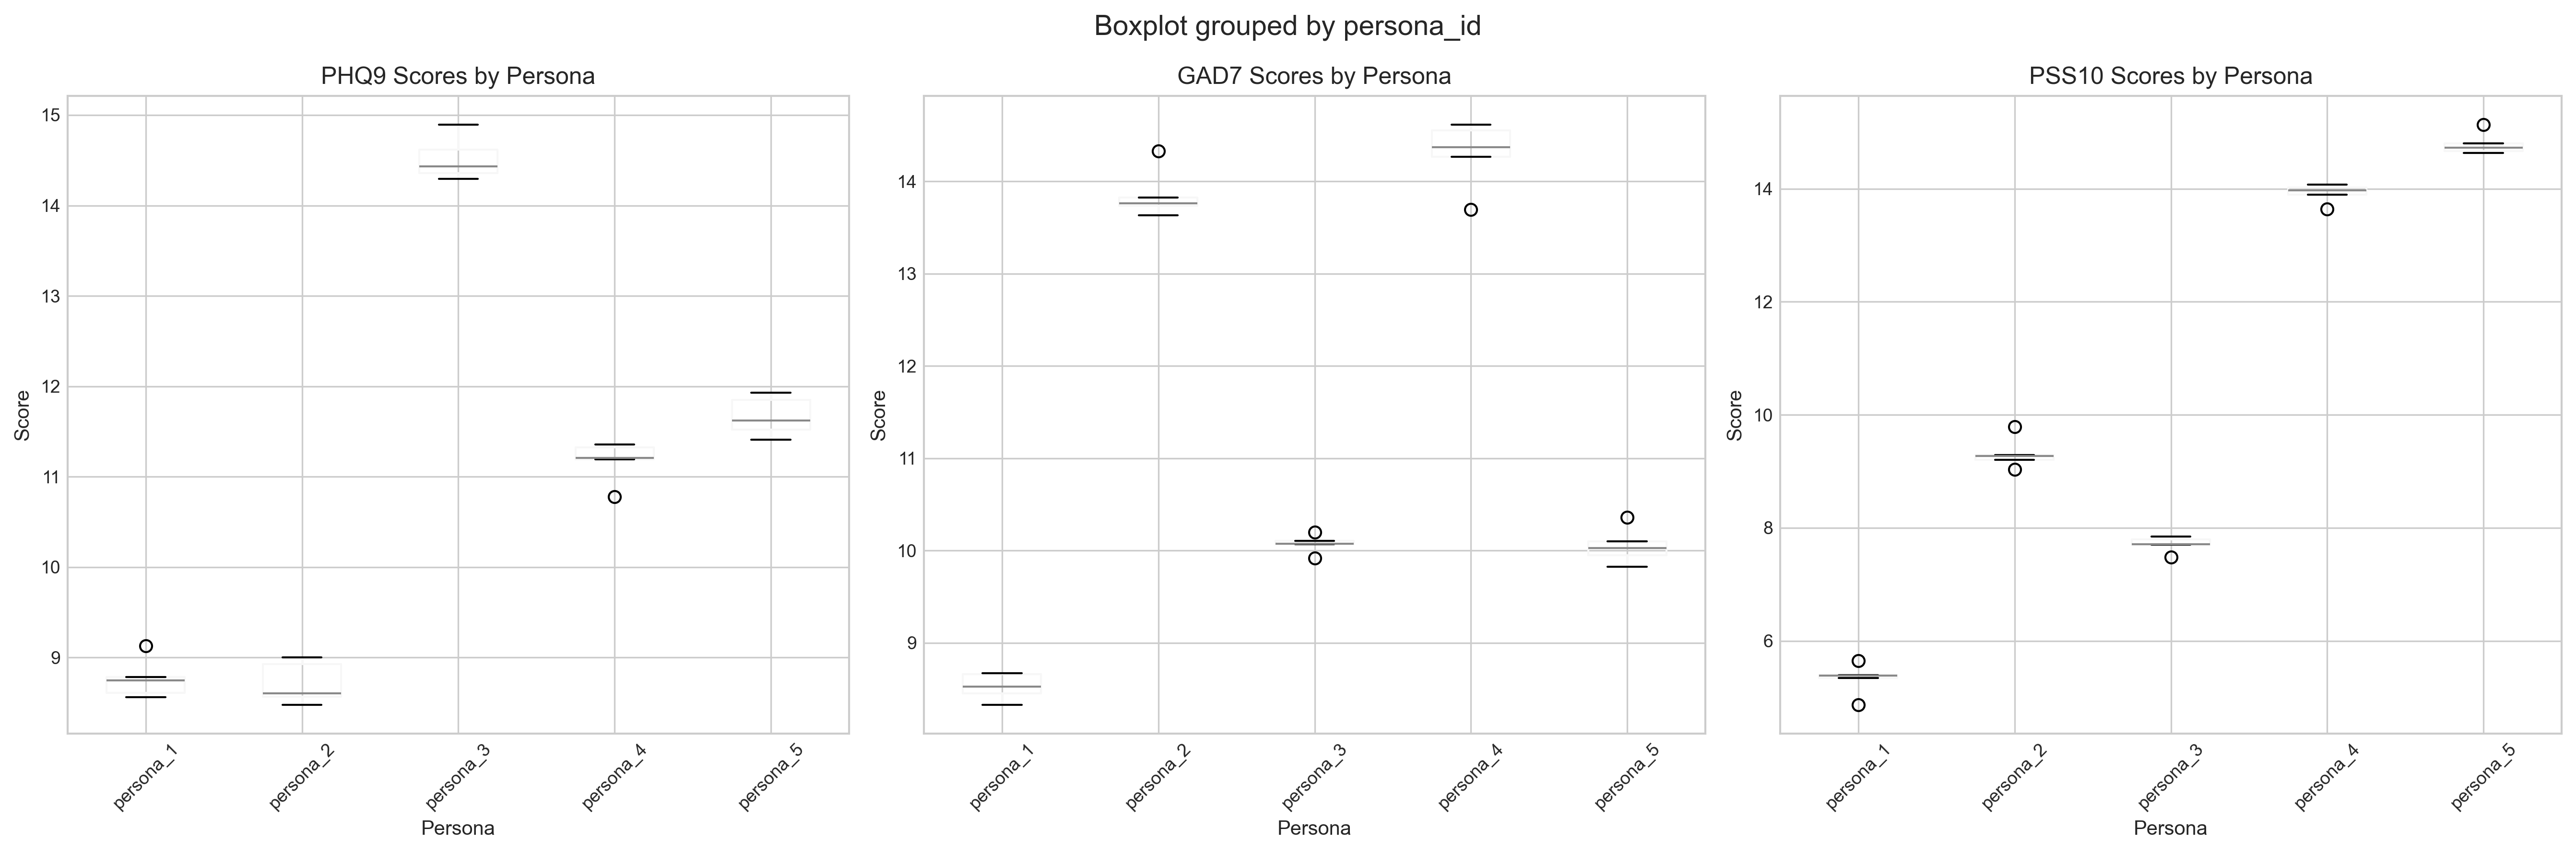

In [19]:
# Compare assessment scores across personas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, assessment_type in enumerate(['phq9', 'gad7', 'pss10']):
    type_data = assessment_data[assessment_data['assessment_type'] == assessment_type]
    
    # Box plot
    type_data.boxplot(column='total_score', by='persona_id', ax=axes[i])
    axes[i].set_title(f'{assessment_type.upper()} Scores by Persona')
    axes[i].set_xlabel('Persona')
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(output_dir / "assessment_scores_by_persona.png", bbox_inches='tight')
plt.show()

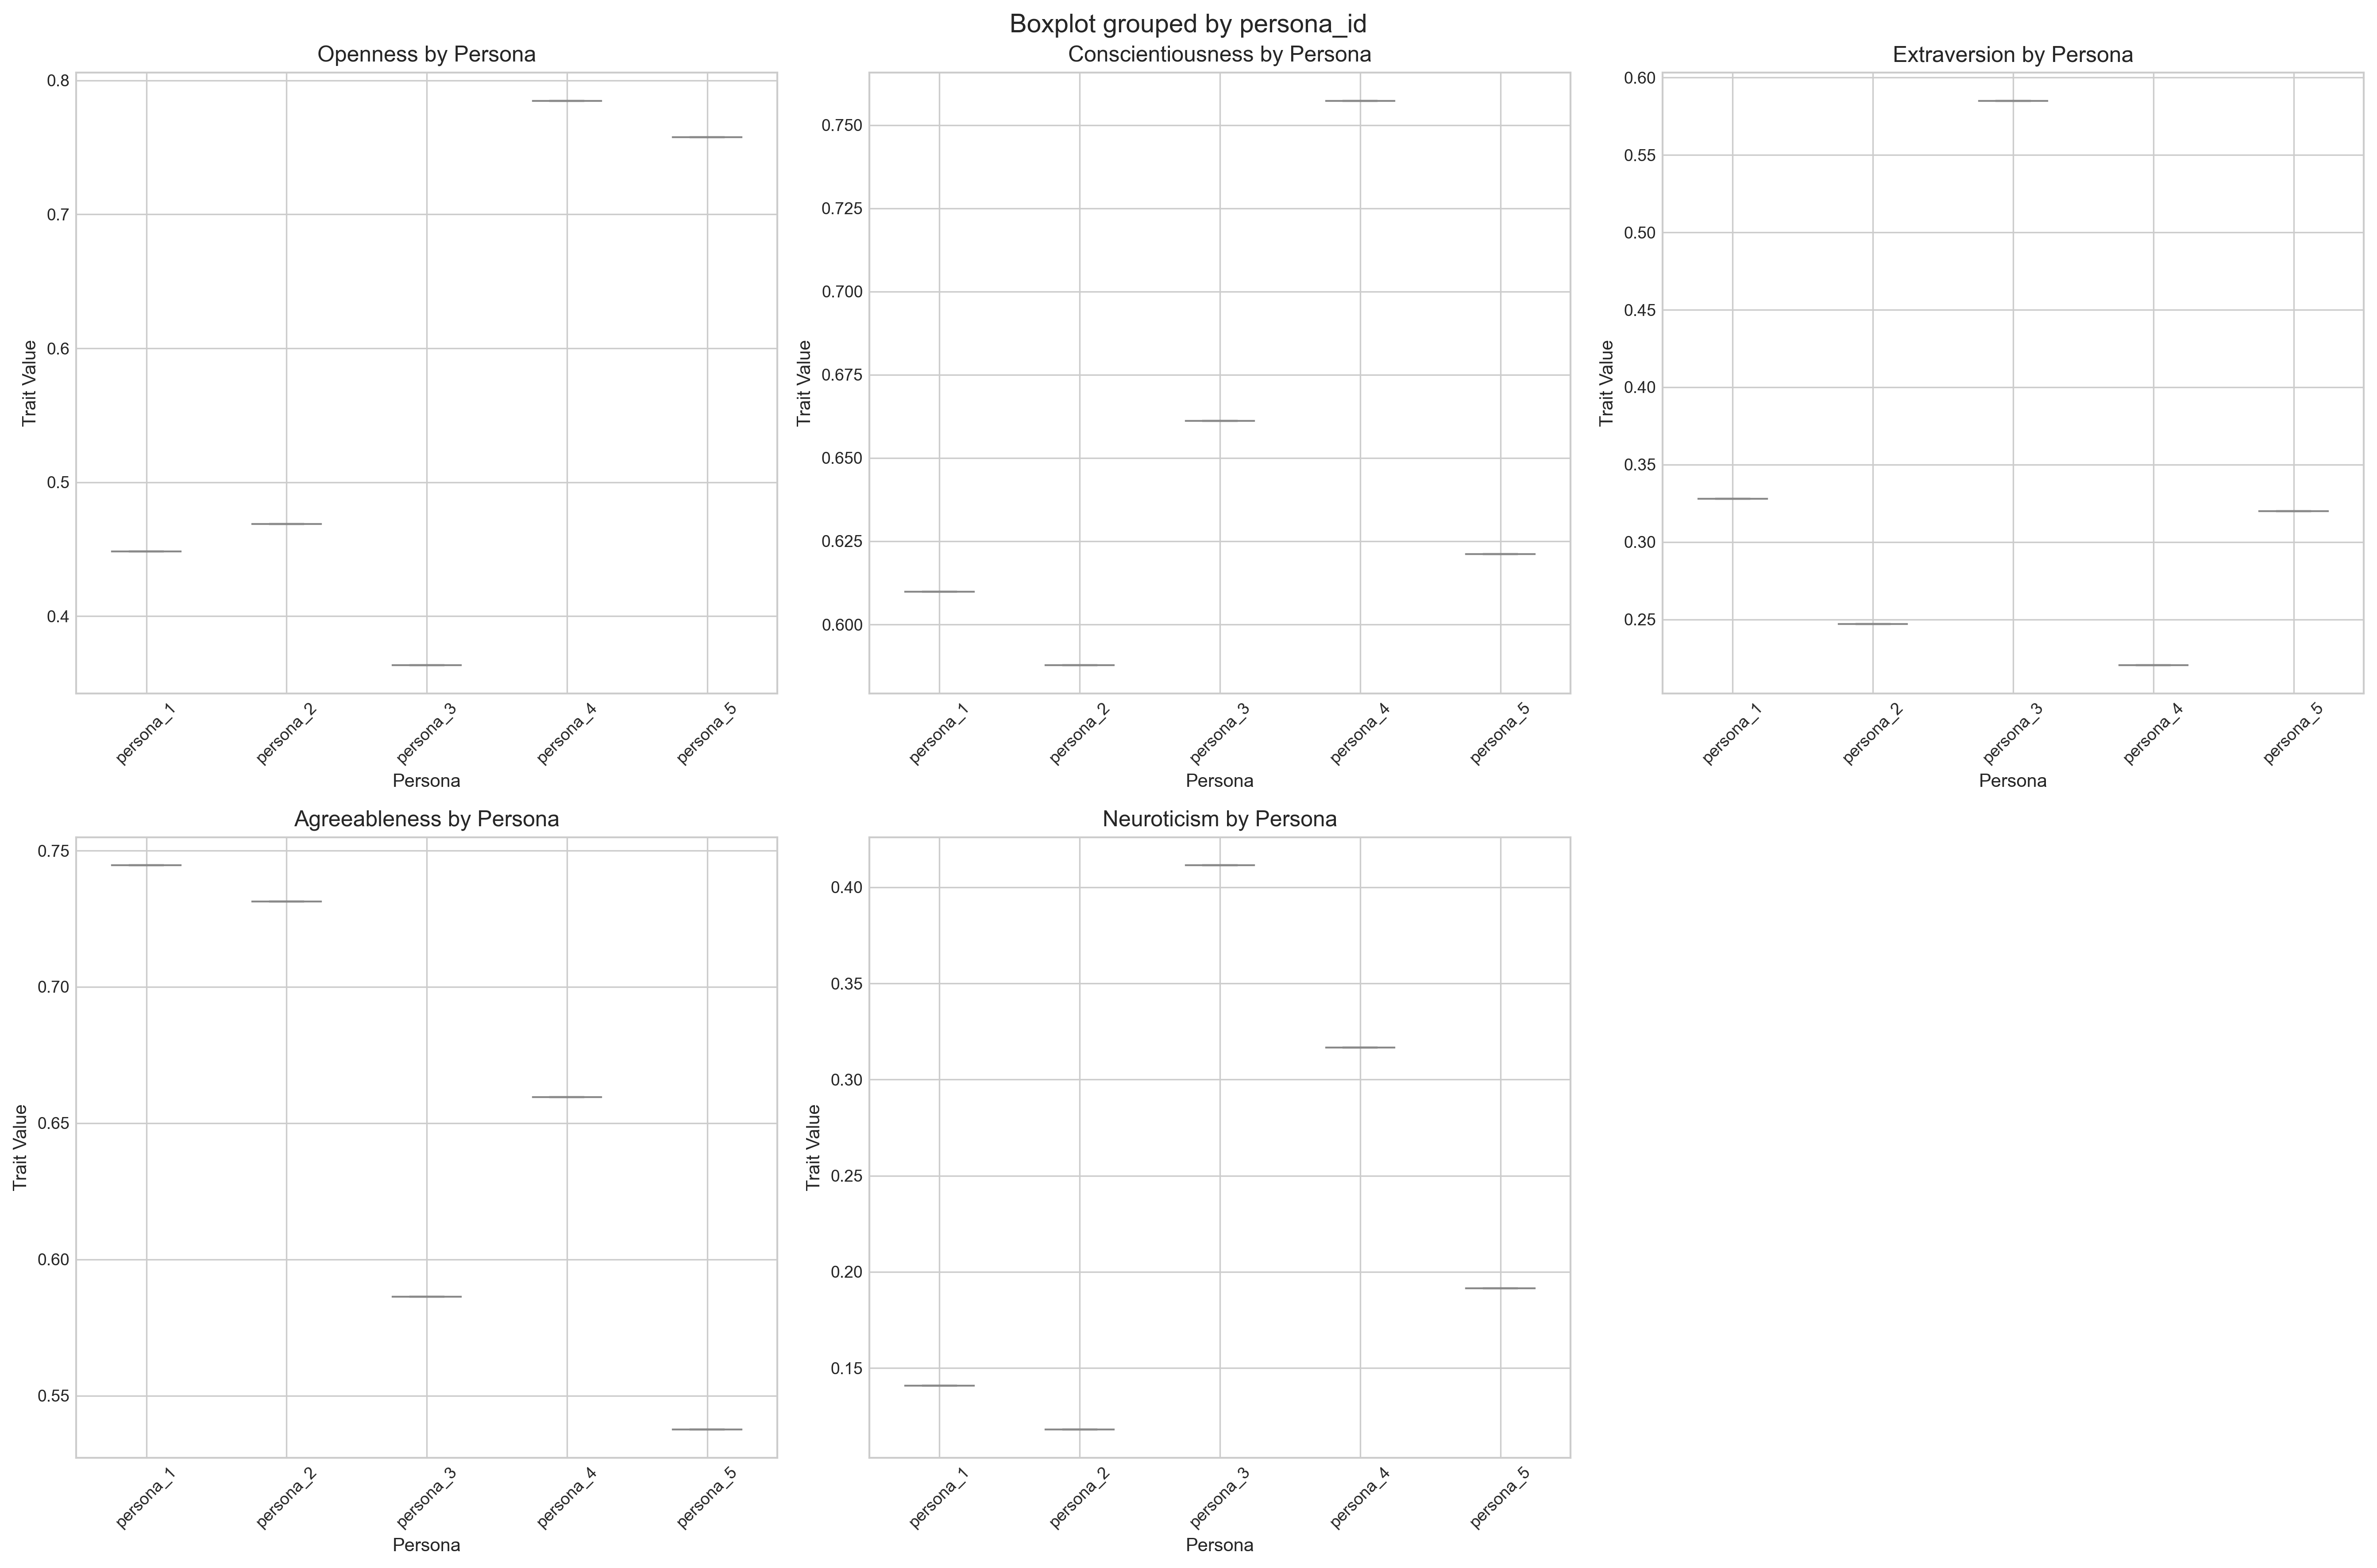

In [20]:
# Compare personality traits across personas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, trait in enumerate(trait_columns):
    row = i // 3
    col = i % 3
    
    # Box plot
    persona_data.boxplot(column=trait, by='persona_id', ax=axes[row, col])
    axes[row, col].set_title(f'{trait.title()} by Persona')
    axes[row, col].set_xlabel('Persona')
    axes[row, col].set_ylabel('Trait Value')
    axes[row, col].tick_params(axis='x', rotation=45)

# Remove the last subplot if not needed
if len(trait_columns) < 6:
    axes[1, 2].remove()

plt.tight_layout()
plt.savefig(output_dir / "personality_traits_by_persona.png", bbox_inches='tight')
plt.show()

In [21]:
# Statistical comparison of assessment scores across personas
print("=== Statistical Comparison of Assessment Scores ===")

for assessment_type in ['phq9', 'gad7', 'pss10']:
    print(f"\n{assessment_type.upper()} Scores:")
    type_data = assessment_data[assessment_data['assessment_type'] == assessment_type]
    
    # One-way ANOVA
    from scipy.stats import f_oneway
    
    persona_groups = [group['total_score'].values for name, group in type_data.groupby('persona_id')]
    f_stat, p_value = f_oneway(*persona_groups)
    
    print(f"  One-way ANOVA: F={f_stat:.3f}, p={p_value:.3f}")
    print(f"  Significant difference: {p_value < 0.05}")

=== Statistical Comparison of Assessment Scores ===

PHQ9 Scores:
  One-way ANOVA: F=549.012, p=0.000
  Significant difference: True

GAD7 Scores:
  One-way ANOVA: F=589.318, p=0.000
  Significant difference: True

PSS10 Scores:
  One-way ANOVA: F=1648.583, p=0.000
  Significant difference: True


## Baseline Analysis

In [22]:
# Baseline clinical scores analysis
print("=== Baseline Clinical Scores Analysis ===")

baseline_scores = ['baseline_phq9', 'baseline_gad7', 'baseline_pss10']
score_names = ['PHQ-9', 'GAD-7', 'PSS-10']

for score, name in zip(baseline_scores, score_names):
    score_data = persona_data[score]
    print(f"\n{name} Baseline Scores:")
    print(f"  Mean: {score_data.mean():.2f}")
    print(f"  Std: {score_data.std():.2f}")
    print(f"  Min: {score_data.min():.2f}")
    print(f"  Max: {score_data.max():.2f}")
    print(f"  Median: {score_data.median():.2f}")

=== Baseline Clinical Scores Analysis ===

PHQ-9 Baseline Scores:
  Mean: 7.02
  Std: 3.63
  Min: 3.05
  Max: 11.41
  Median: 7.19

GAD-7 Baseline Scores:
  Mean: 5.38
  Std: 2.08
  Min: 2.41
  Max: 7.11
  Median: 6.34

PSS-10 Baseline Scores:
  Mean: 11.43
  Std: 1.70
  Min: 9.84
  Max: 13.31
  Median: 10.87


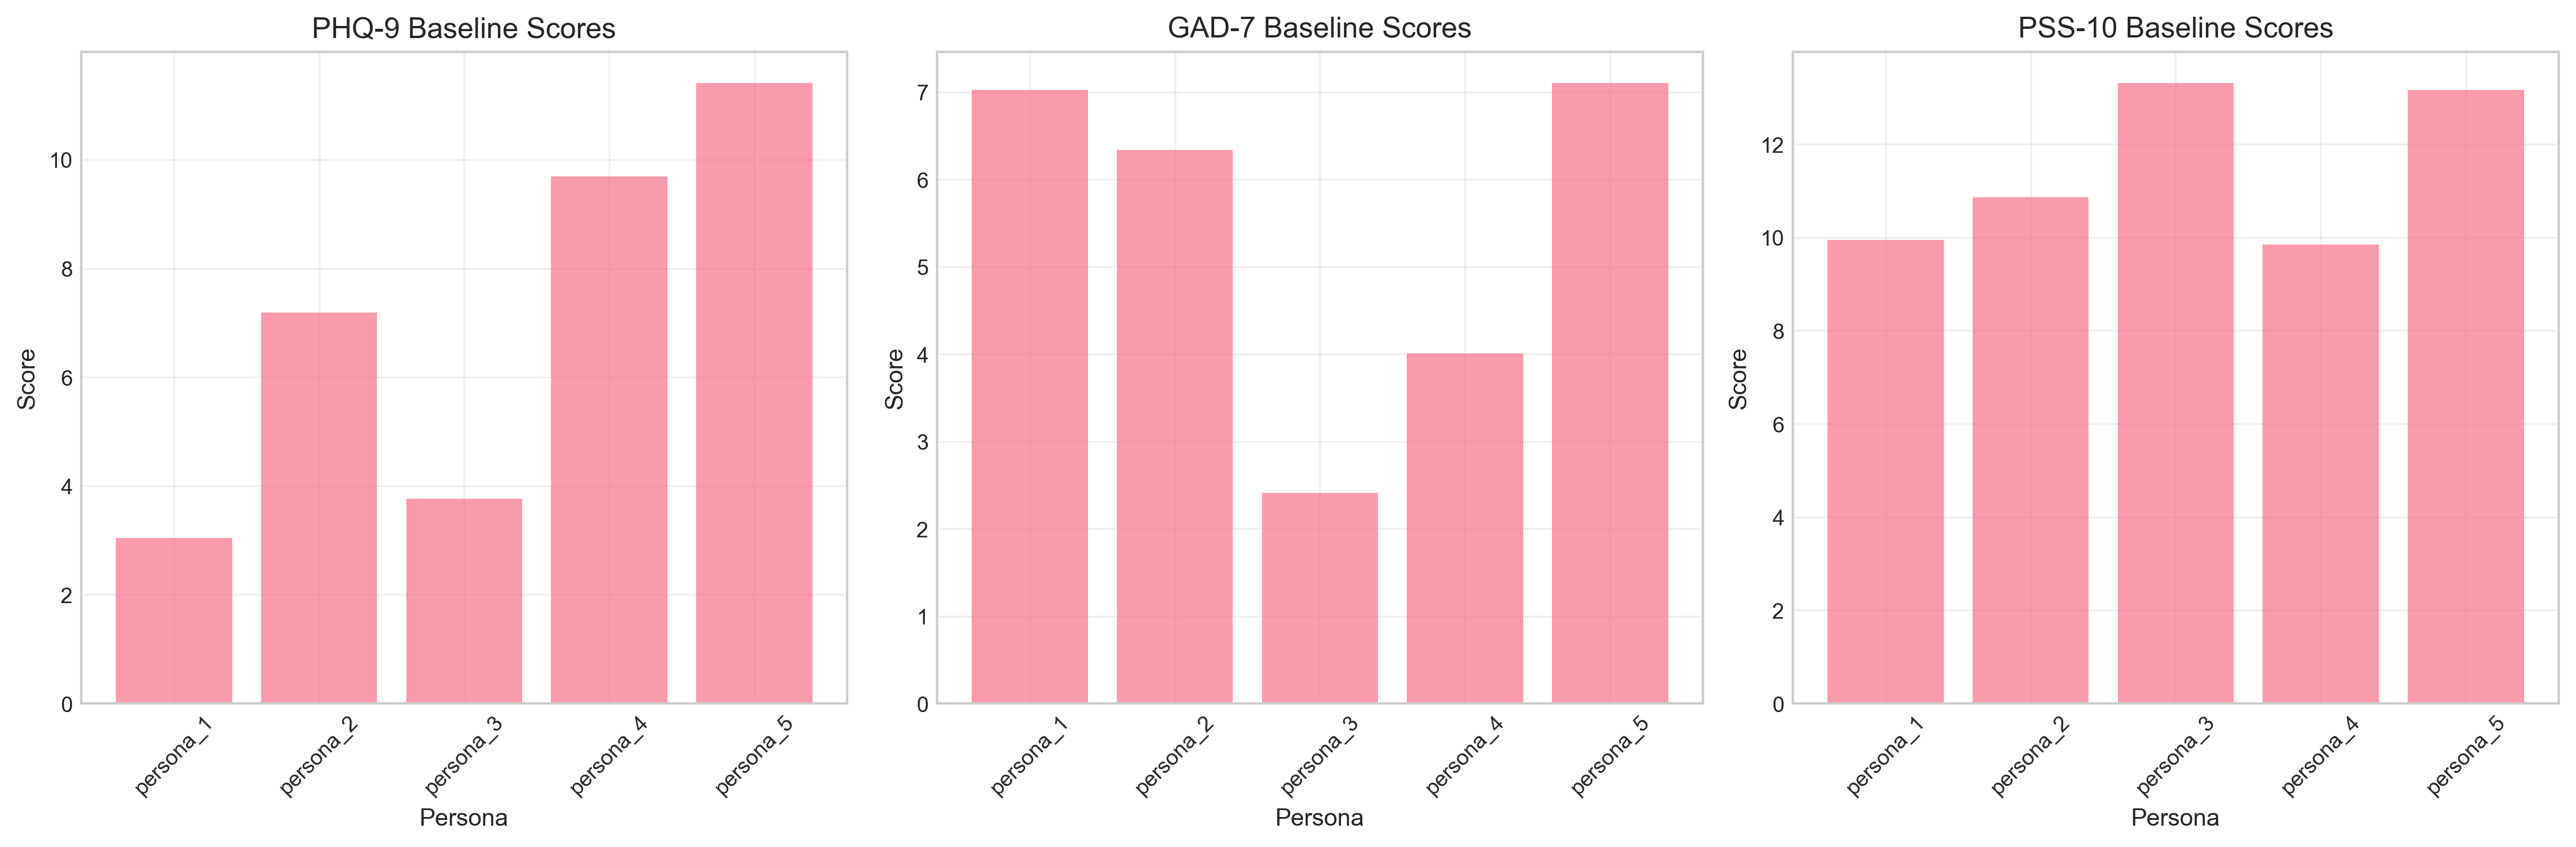

In [23]:
# Visualize baseline scores
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (score, name) in enumerate(zip(baseline_scores, score_names)):
    score_data = persona_data[score]
    
    axes[i].bar(range(len(score_data)), score_data, alpha=0.7)
    axes[i].set_title(f'{name} Baseline Scores')
    axes[i].set_xlabel('Persona')
    axes[i].set_ylabel('Score')
    axes[i].set_xticks(range(len(score_data)))
    axes[i].set_xticklabels(persona_data['persona_id'], rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / "baseline_clinical_scores.png", bbox_inches='tight')
plt.show()

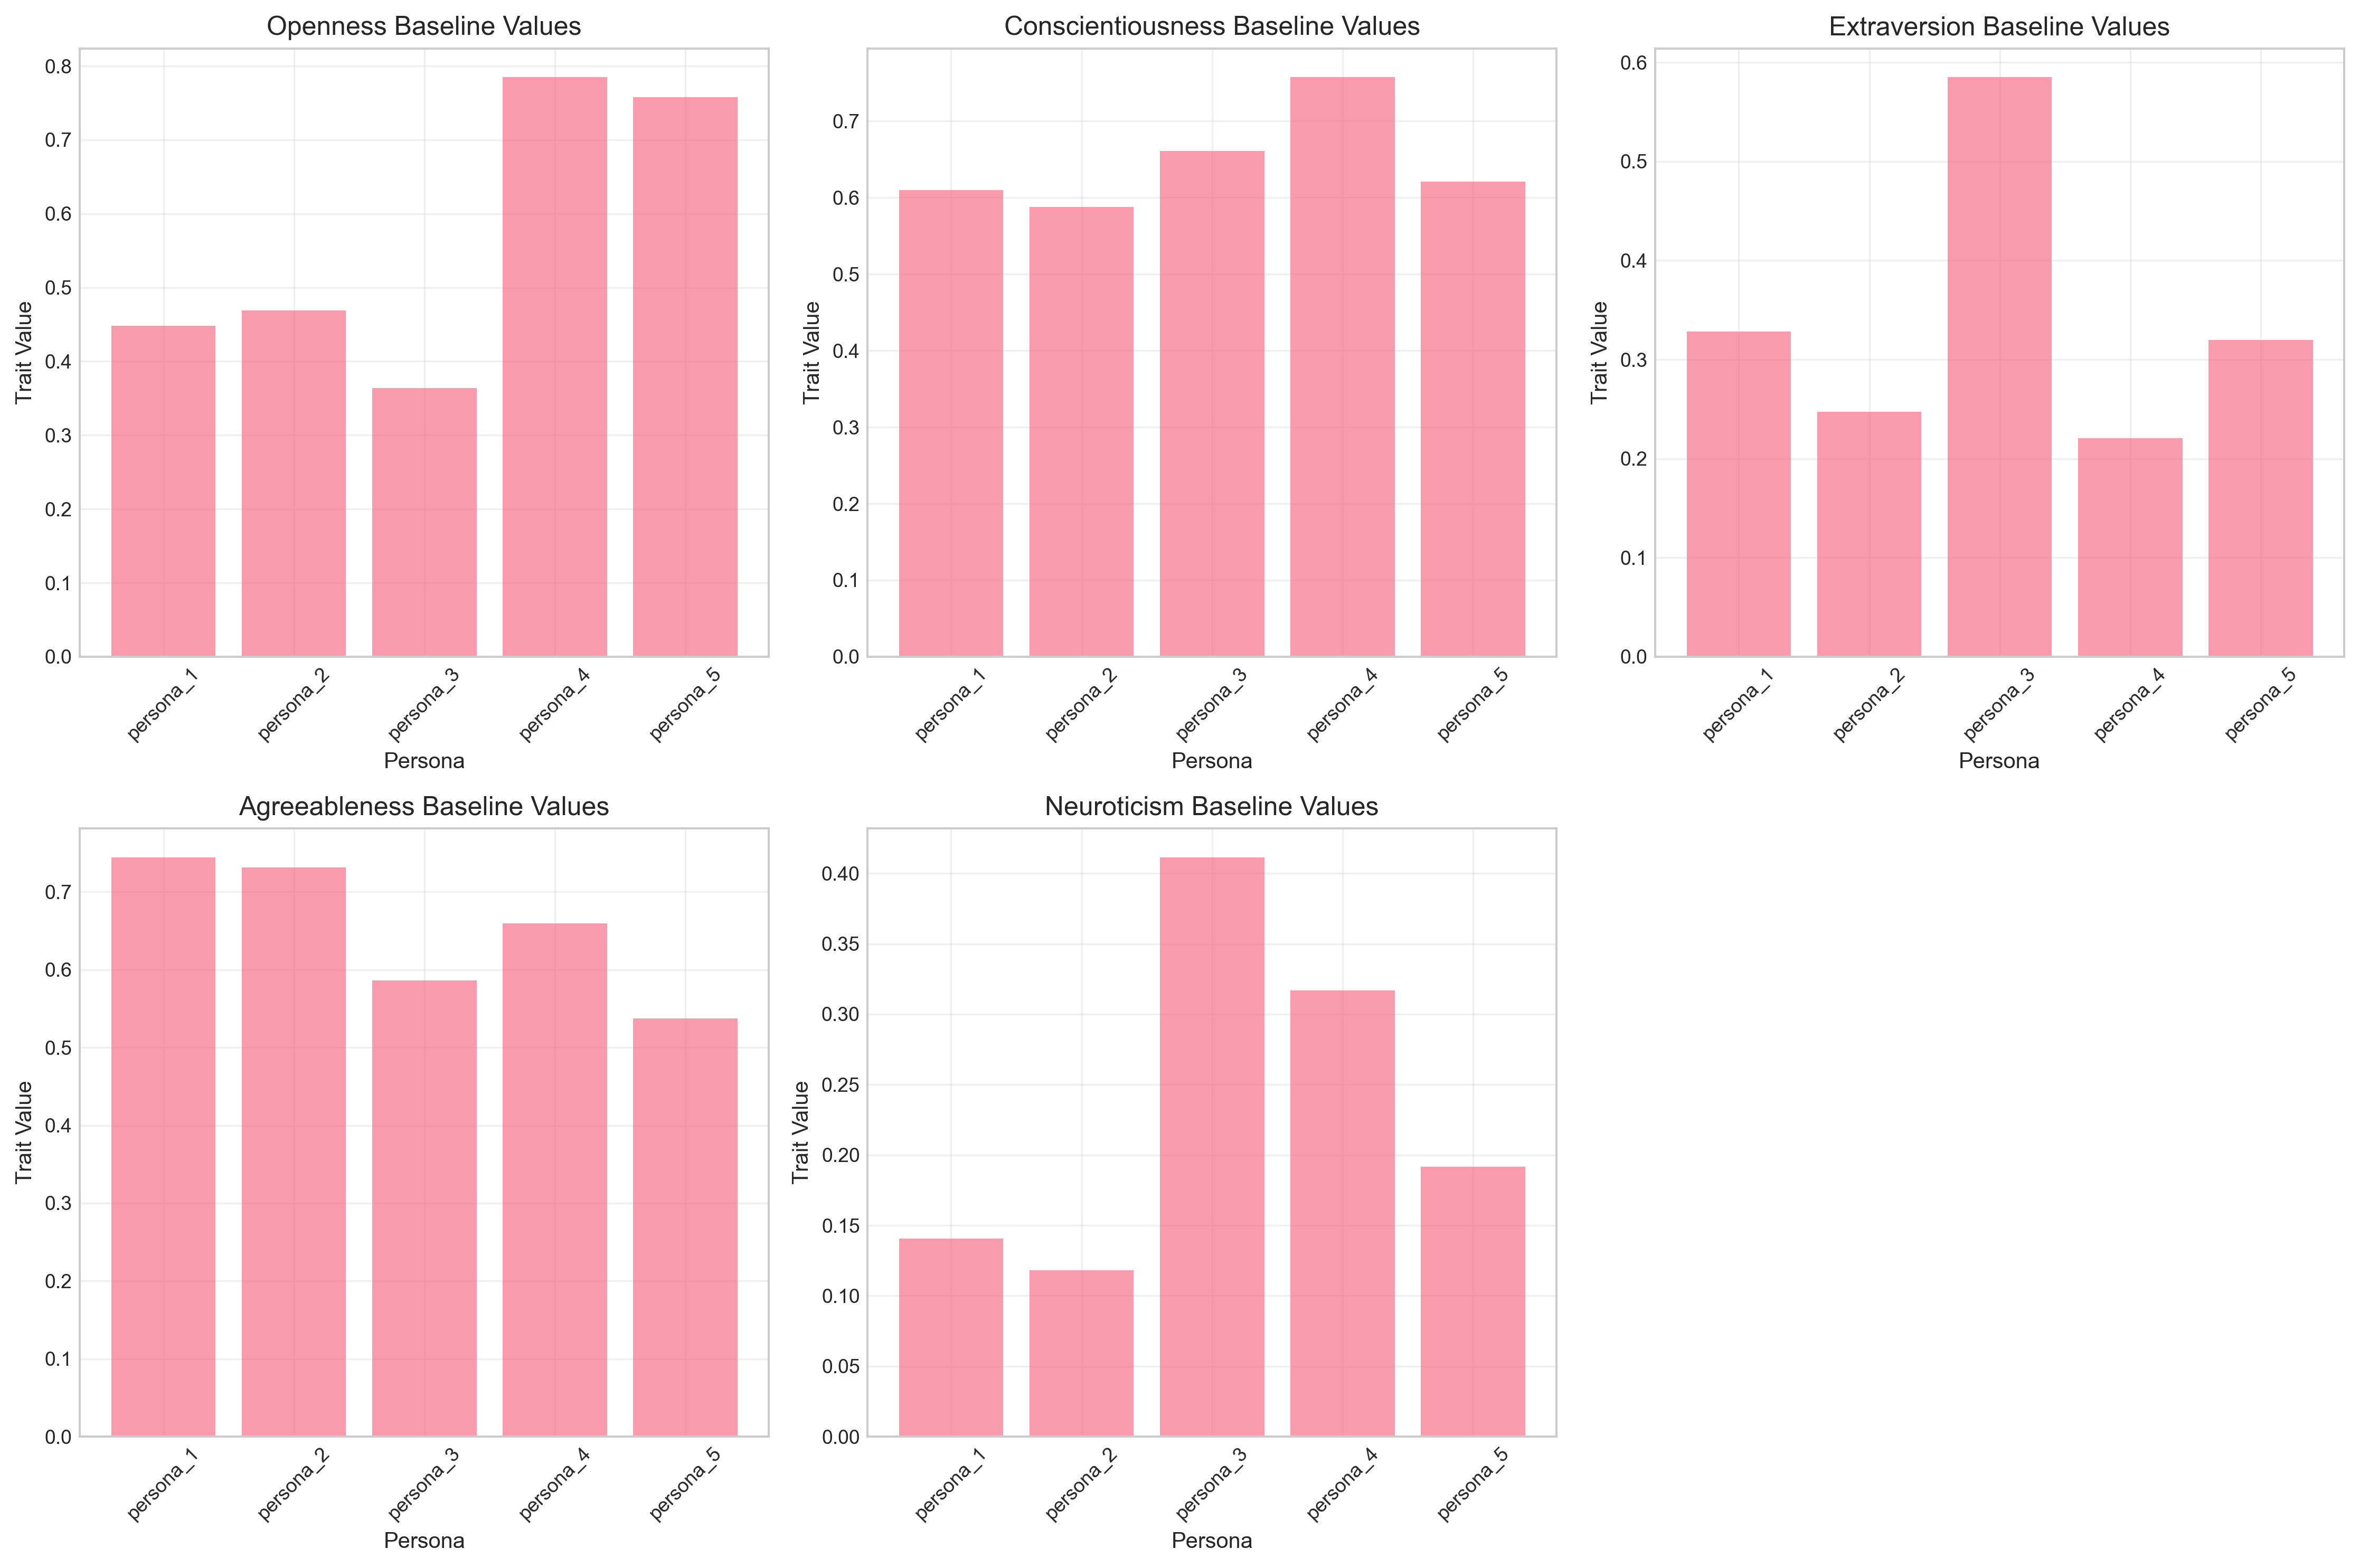

In [24]:
# Baseline personality traits
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, trait in enumerate(trait_columns):
    row = i // 3
    col = i % 3
    
    trait_data = persona_data[trait]
    
    axes[row, col].bar(range(len(trait_data)), trait_data, alpha=0.7)
    axes[row, col].set_title(f'{trait.title()} Baseline Values')
    axes[row, col].set_xlabel('Persona')
    axes[row, col].set_ylabel('Trait Value')
    axes[row, col].set_xticks(range(len(trait_data)))
    axes[row, col].set_xticklabels(persona_data['persona_id'], rotation=45)
    axes[row, col].grid(True, alpha=0.3)

# Remove the last subplot if not needed
if len(trait_columns) < 6:
    axes[1, 2].remove()

plt.tight_layout()
plt.savefig(output_dir / "baseline_personality_traits.png", bbox_inches='tight')
plt.show()

## Statistical Summary Tables

In [26]:
# Create summary table
print("=== Statistical Summary ===")

# Assessment data summary
assessment_summary = assessment_data.groupby('assessment_type')['total_score'].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
]).round(2)

print("\nAssessment Scores Summary:")
print(assessment_summary)

=== Statistical Summary ===

Assessment Scores Summary:
                 count   mean   std   min    max  median
assessment_type                                         
gad7                25  11.36  2.35  8.33  14.61   10.11
phq9                25  10.97  2.20  8.48  14.89   11.21
pss10               25  10.21  3.70  4.87  15.13    9.28


In [27]:
# Personality traits summary
personality_summary = persona_data[trait_columns].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
]).round(3)

print("\nPersonality Traits Summary:")
print(personality_summary)


Personality Traits Summary:
        openness  conscientiousness  extraversion  agreeableness  neuroticism
count      5.000              5.000         5.000          5.000        5.000
mean       0.565              0.647         0.340          0.652        0.236
std        0.193              0.067         0.144          0.090        0.125
min        0.364              0.588         0.221          0.538        0.118
max        0.785              0.757         0.585          0.745        0.411
median     0.469              0.621         0.320          0.660        0.191


In [28]:
# Clinical baseline summary
clinical_summary = persona_data[baseline_scores].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
]).round(2)

print("\nClinical Baseline Summary:")
print(clinical_summary)


Clinical Baseline Summary:
        baseline_phq9  baseline_gad7  baseline_pss10
count            5.00           5.00            5.00
mean             7.02           5.38           11.43
std              3.63           2.08            1.70
min              3.05           2.41            9.84
max             11.41           7.11           13.31
median           7.19           6.34           10.87


In [29]:
# Mechanistic data summary
mechanistic_summary = mechanistic_data[['attention_weight', 'activation_value', 'drift_magnitude']].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
]).round(3)

print("\nMechanistic Data Summary:")
print(mechanistic_summary)


Mechanistic Data Summary:
        attention_weight  activation_value  drift_magnitude
count            300.000           300.000          300.000
mean               0.484            -0.044            0.108
std                0.238             0.601            0.057
min                0.105            -0.991            0.002
max                0.898             0.982            0.200
median             0.466            -0.069            0.113


## Publication-Quality Figure Generation

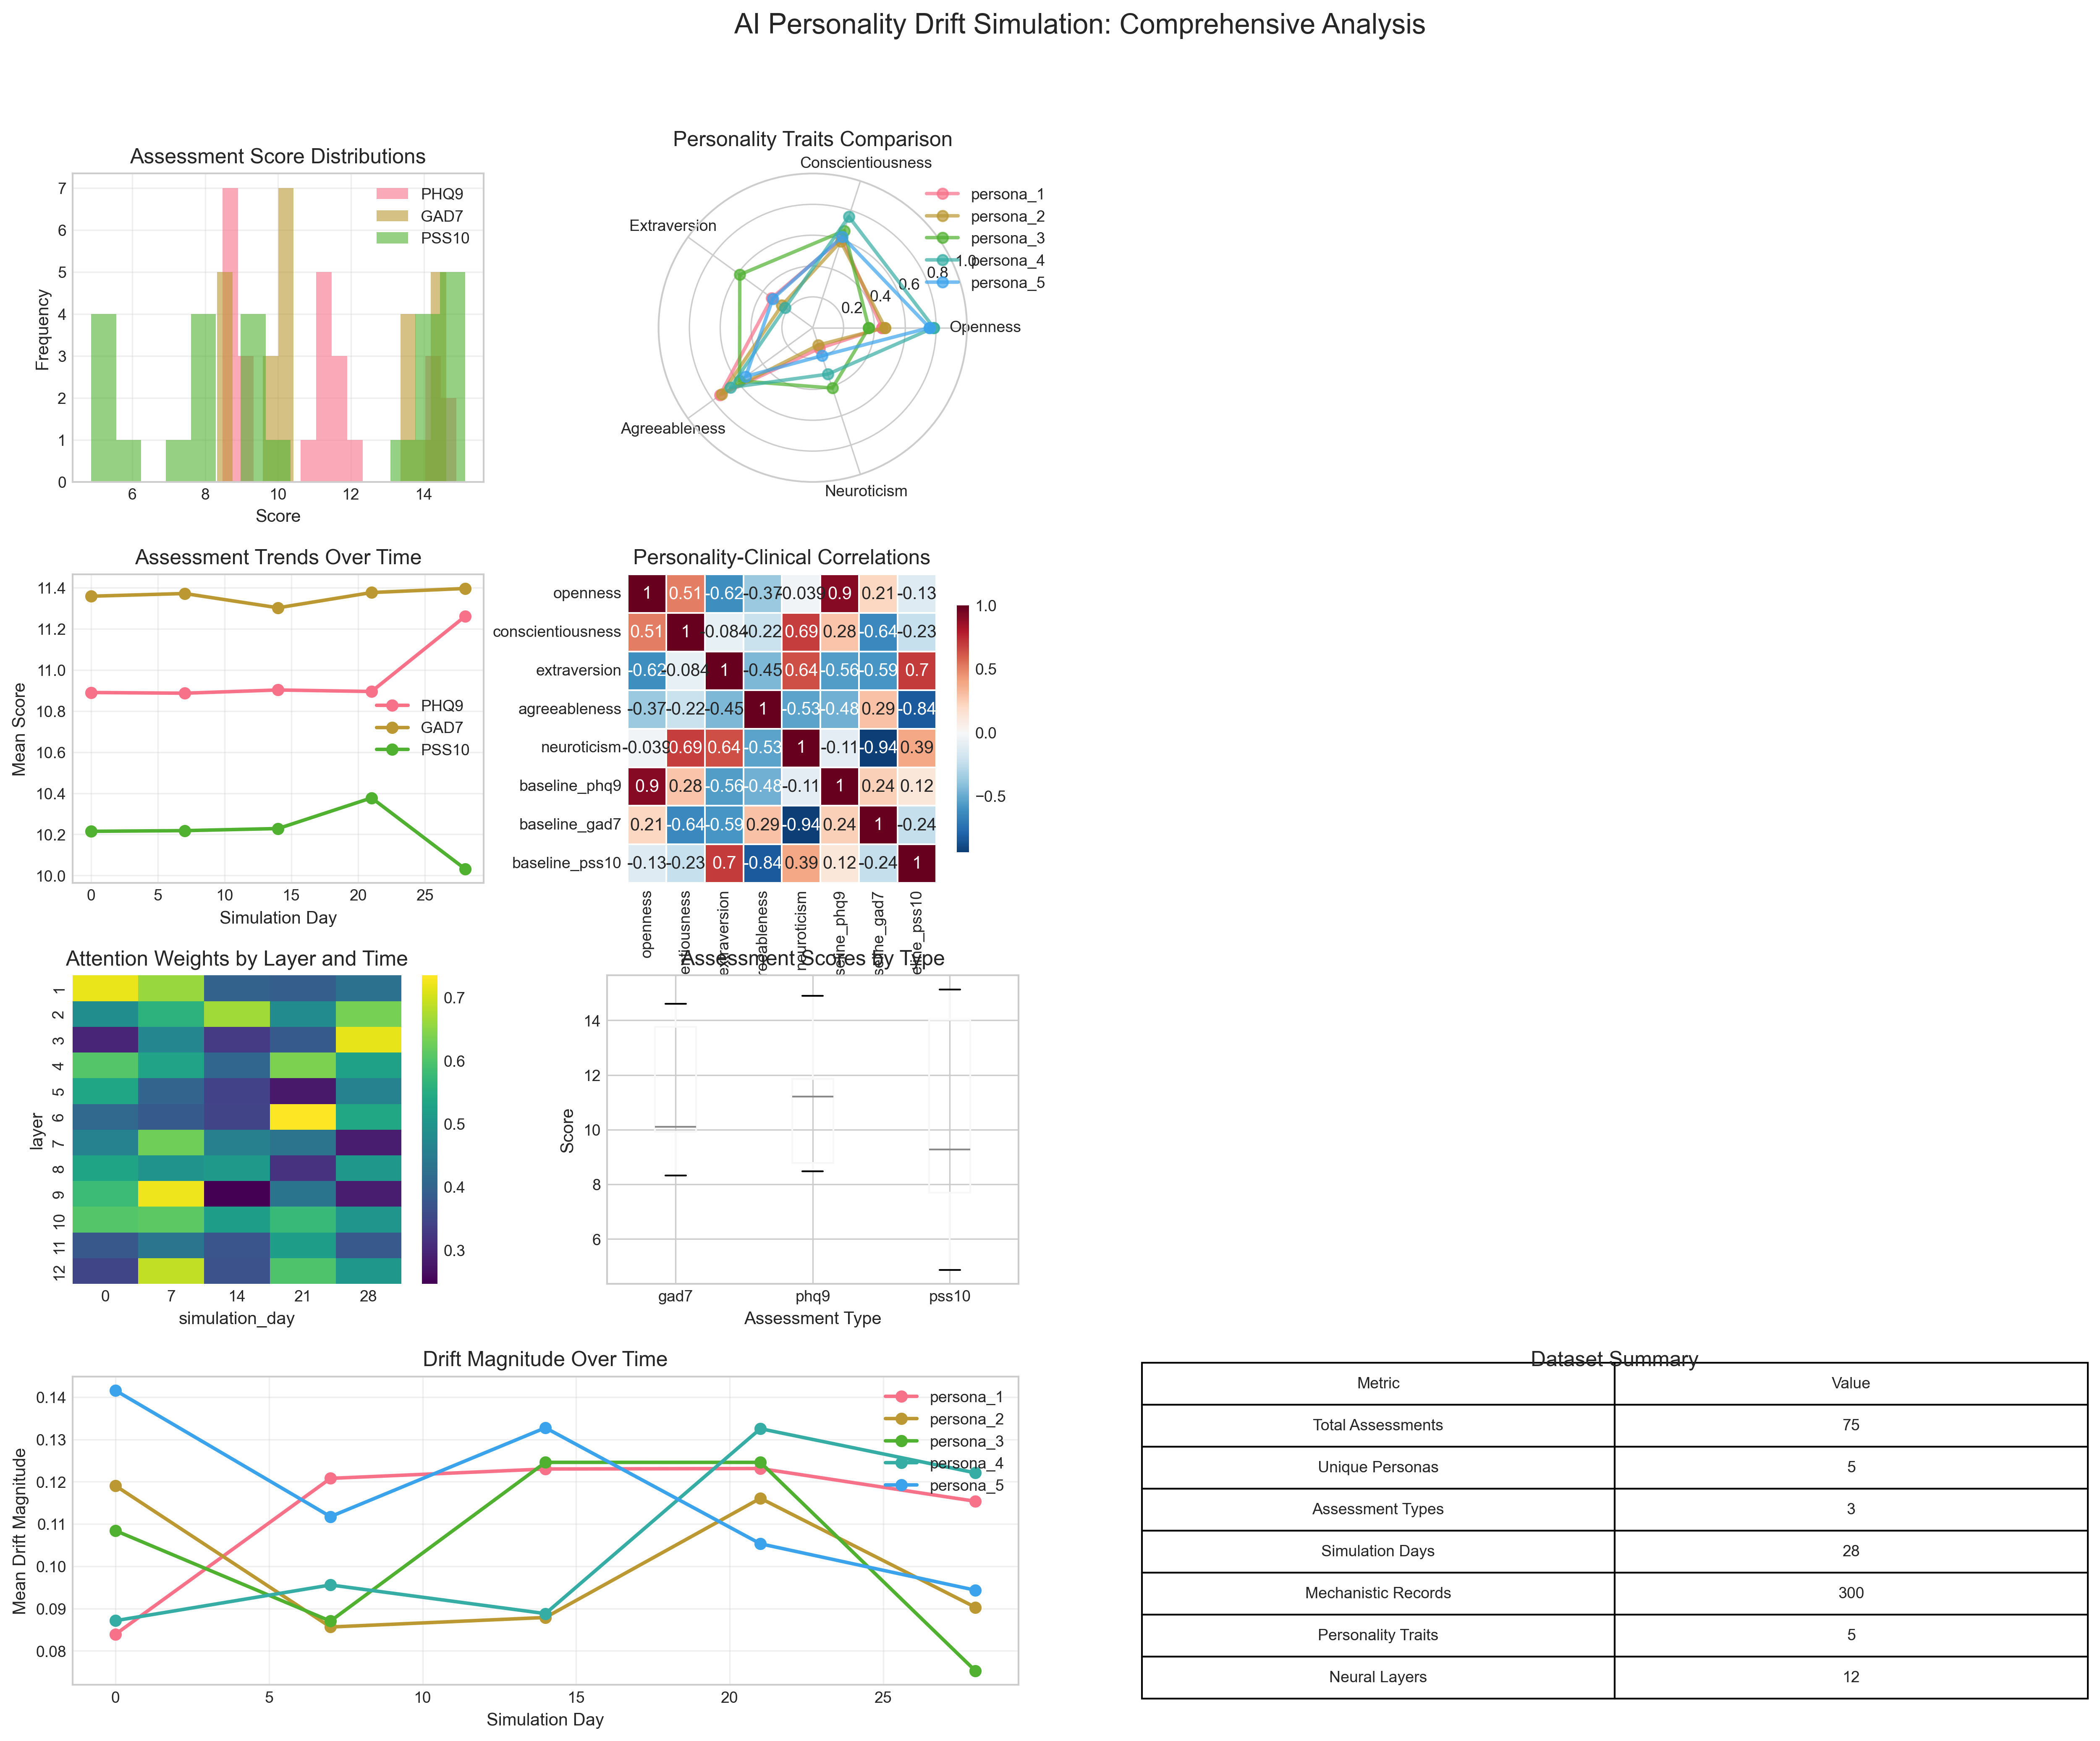

In [30]:
# Create comprehensive publication figure
fig = plt.figure(figsize=(20, 16))

# Create subplots
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# 1. Assessment score distributions (top left)
ax1 = fig.add_subplot(gs[0, 0])
for assessment_type in ['phq9', 'gad7', 'pss10']:
    type_data = assessment_data[assessment_data['assessment_type'] == assessment_type]['total_score']
    ax1.hist(type_data, alpha=0.6, label=assessment_type.upper(), bins=15)
ax1.set_title('Assessment Score Distributions')
ax1.set_xlabel('Score')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Personality traits radar (top right)
ax2 = fig.add_subplot(gs[0, 1], projection='polar')
angles = np.linspace(0, 2 * np.pi, len(trait_columns), endpoint=False).tolist()
angles += angles[:1]

for i, persona in enumerate(persona_data['persona_id']):
    values = [persona_data[persona_data['persona_id'] == persona][trait].iloc[0] for trait in trait_columns]
    values += values[:1]
    ax2.plot(angles, values, 'o-', linewidth=2, label=persona, alpha=0.7)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels([trait.title() for trait in trait_columns])
ax2.set_ylim(0, 1)
ax2.set_title('Personality Traits Comparison')
ax2.legend(bbox_to_anchor=(1.3, 1.0))

# 3. Assessment trends over time (middle left)
ax3 = fig.add_subplot(gs[1, 0])
for assessment_type in ['phq9', 'gad7', 'pss10']:
    type_data = assessment_data[assessment_data['assessment_type'] == assessment_type]
    ax3.plot(type_data.groupby('simulation_day')['total_score'].mean(), 
             marker='o', label=assessment_type.upper(), linewidth=2)
ax3.set_title('Assessment Trends Over Time')
ax3.set_xlabel('Simulation Day')
ax3.set_ylabel('Mean Score')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Correlation matrix (middle right)
ax4 = fig.add_subplot(gs[1, 1])
correlation_data = persona_data[trait_columns + baseline_scores]
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
           square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax4)
ax4.set_title('Personality-Clinical Correlations')

# 5. Mechanistic data heatmap (bottom left)
ax5 = fig.add_subplot(gs[2, 0])
attention_pivot = mechanistic_data.pivot_table(
    values='attention_weight', 
    index='layer', 
    columns='simulation_day', 
    aggfunc='mean'
)
sns.heatmap(attention_pivot, cmap='viridis', ax=ax5)
ax5.set_title('Attention Weights by Layer and Time')

# 6. Box plots for assessment scores (bottom right)
ax6 = fig.add_subplot(gs[2, 1])
assessment_data.boxplot(column='total_score', by='assessment_type', ax=ax6)
ax6.set_title('Assessment Scores by Type')
ax6.set_xlabel('Assessment Type')
ax6.set_ylabel('Score')

# 7. Drift magnitude over time (bottom)
ax7 = fig.add_subplot(gs[3, :2])
for persona in mechanistic_data['persona_id'].unique():
    persona_data = mechanistic_data[mechanistic_data['persona_id'] == persona]
    ax7.plot(persona_data.groupby('simulation_day')['drift_magnitude'].mean(), 
             marker='o', label=persona, linewidth=2)
ax7.set_title('Drift Magnitude Over Time')
ax7.set_xlabel('Simulation Day')
ax7.set_ylabel('Mean Drift Magnitude')
ax7.legend()
ax7.grid(True, alpha=0.3)

# 8. Summary statistics table (bottom right)
ax8 = fig.add_subplot(gs[3, 2:])
ax8.axis('tight')
ax8.axis('off')

# Create summary table
summary_data = [
    ['Total Assessments', len(assessment_data)],
    ['Unique Personas', assessment_data['persona_id'].nunique()],
    ['Assessment Types', len(assessment_data['assessment_type'].unique())],
    ['Simulation Days', assessment_data['simulation_day'].max()],
    ['Mechanistic Records', len(mechanistic_data)],
    ['Personality Traits', len(trait_columns)],
    ['Neural Layers', mechanistic_data['layer'].nunique()]
]

table = ax8.table(cellText=summary_data, colLabels=['Metric', 'Value'], 
                 cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
ax8.set_title('Dataset Summary')

plt.suptitle('AI Personality Drift Simulation: Comprehensive Analysis', fontsize=16, y=0.98)
plt.savefig(output_dir / "comprehensive_publication_figure.png", bbox_inches='tight', dpi=300)
plt.show()

## Export Results

In [31]:
# Export data for publication
publication_files = data_exporter.export_for_publication(
    assessment_data, persona_data, mechanistic_data
)

print("=== Publication Data Export ===")
for data_type, file_path in publication_files.items():
    print(f"{data_type}: {file_path}")

=== Publication Data Export ===
assessment: data/results/publication/assessment_data.csv
persona: data/results/publication/persona_data.csv
mechanistic: data/results/publication/mechanistic_data.csv
dictionary: data/results/publication/data_dictionary.json
readme: data/results/publication/README.md
